<a href="https://colab.research.google.com/github/anjanay-anjanay/DLNLP/blob/main/TimeSeriesRoboHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# 1.0.2
# Simplify file path handling
from pathlib import Path

In [ ]:
# 1.1 Mount Google Drive for data access
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# 1.2 Display from a cell outputs of multiple commands:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 1.2.1 Where is our data:

pathToFolder = "/gdrive/MyDrive/Rac_robo_health"

In [ ]:
# 1.2.2 specific path to the FIFA22 dataset file

path = Path(pathToFolder) / "formatted_data.csv"

In [ ]:
# 2.1 Load the data
df = pd.read_csv(path)

In [ ]:
df.head()

SNo  Current J1  Position J1  Current J2  Position J2  Current J3  \
0    1       -1.18        53.00        1.32       -22.00       -0.08   
1    3       -1.88        52.95       -0.49       -22.02       -3.20   
2    2       -1.88        52.95       -0.49       -22.02       -3.20   
3    4       -4.78        52.74       -5.34       -22.11        3.05   
4    5       -9.12        52.02       -5.07       -22.35        3.90   

   Position J3  Current J4  Position J4  Current J5  ...  Program Register  \
0         0.01        0.05        -0.01        0.12  ...                41   
1         0.20        0.01        -0.30        1.84  ...                41   
2         0.20        0.01        -0.30        1.84  ...                41   
3         1.13       -5.05        -1.77        6.95  ...                41   
4         2.95      -10.19        -4.77       12.25  ...                41   

   Program Name  Program Line Number Robot Fault Output  Alarm  \
0         O0911                  NaN                NaN    NaN   
1         O0911                  NaN                NaN    NaN   
2         O0911                  NaN                NaN    NaN   
3         O0911                  NaN                NaN    NaN   
4         O0911                  NaN                NaN    NaN   

  Battery Low Level Output        Date        TimeStamp  Quality  \
0                      NaN  2023-06-23  07-09-30.744000      NaN   
1                      NaN  2023-06-23  07-09-30.794000      NaN   
2                      NaN  2023-06-23  07-09-30.794000      NaN   
3                      NaN  2023-06-23  07-09-30.857000      NaN   
4                      NaN  2023-06-23  07-09-30.920000      NaN   

  record_timestamp  
0     1.687504e+09  
1     1.687504e+09  
2     1.687504e+09  
3     1.687504e+09  
4     1.687504e+09  

[5 rows x 24 columns]

#DATA CLEANING

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
SNo                               0
Current J1                        0
Position J1                       0
Current J2                        0
Position J2                       0
Current J3                        0
Position J3                       0
Current J4                        0
Position J4                       0
Current J5                        0
Position J5                       0
Current J6                        0
Position J6                       0
Cycle Number                      0
Program Register                  0
Program Name                      0
Program Line Number          426029
Robot Fault Output           426029
Alarm                       3959302
Battery Low Level Output     426029
Date                              0
TimeStamp                         0
Quality                      426029
record_timestamp                  0
dtype: int64


In [ ]:
columns_with_missing_values = ['Program Line Number', 'Robot Fault Output', 'Alarm', 'Battery Low Level Output', 'Quality']

# Now, let's remove those columns from the DataFrame
df_cleaned = df.drop(columns=columns_with_missing_values)
df = df_cleaned


In [ ]:
#Wavelet Transforms

df = df_cleaned


In [ ]:
df

SNo  Current J1  Position J1  Current J2  Position J2  Current J3  \
0             1       -1.18        53.00        1.32       -22.00       -0.08   
1             3       -1.88        52.95       -0.49       -22.02       -3.20   
2             2       -1.88        52.95       -0.49       -22.02       -3.20   
3             4       -4.78        52.74       -5.34       -22.11        3.05   
4             5       -9.12        52.02       -5.07       -22.35        3.90   
...         ...         ...          ...         ...          ...         ...   
3959297  374706       -8.03        11.18        0.02       -12.11        5.52   
3959298  374707       -7.10        11.18        0.02       -12.11        5.51   
3959299  374708       -7.10        11.18        0.02       -12.11        5.51   
3959300  374709       -7.57        11.18        0.02       -12.11        5.51   
3959301  374710       -7.57        11.18        0.02       -12.11        5.51   

         Position J3  Current J4  Position J4  Current J5  Position J5  \
0               0.01        0.05        -0.01        0.12       -90.00   
1               0.20        0.01        -0.30        1.84       -90.10   
2               0.20        0.01        -0.30        1.84       -90.10   
3               1.13       -5.05        -1.77        6.95       -90.56   
4               2.95      -10.19        -4.77       12.25       -91.48   
...              ...         ...          ...         ...          ...   
3959297        91.95     -318.16       100.00     -248.64       -90.00   
3959298        91.95     -318.16       100.00     -238.64       -90.00   
3959299        91.95     -318.16       100.00     -238.64       -90.00   
3959300        91.95     -318.16       100.00     -243.64       -90.00   
3959301        91.95     -318.16       100.00     -243.64       -90.00   

         Current J6  Position J6                          Cycle Number  \
0              0.95        85.72  WSBYMBROW000032_41_20230623_07:09:30   
1              1.07        85.60  WSBYMBROW000032_41_20230623_07:09:30   
2              1.07        85.60  WSBYMBROW000032_41_20230623_07:09:30   
3              8.93        85.94  WSBYMBROW000032_41_20230623_07:09:30   
4              6.73        87.03  WSBYMBROW000032_41_20230623_07:09:30   
...             ...          ...                                   ...   
3959297       -9.85        85.88  WSBYMBROW000032_41_20230805_22:47:27   
3959298       -9.83        85.95  WSBYMBROW000032_41_20230805_22:47:27   
3959299       -9.83        85.95  WSBYMBROW000032_41_20230805_22:47:27   
3959300       -9.96        85.99  WSBYMBROW000032_41_20230805_22:47:27   
3959301       -9.96        85.99  WSBYMBROW000032_41_20230805_22:47:27   

         Program Register Program Name        Date        TimeStamp  \
0                      41        O0911  2023-06-23  07-09-30.744000   
1                      41        O0911  2023-06-23  07-09-30.794000   
2                      41        O0911  2023-06-23  07-09-30.794000   
3                      41        O0911  2023-06-23  07-09-30.857000   
4                      41        O0911  2023-06-23  07-09-30.920000   
...                   ...          ...         ...              ...   
3959297                41      RSR0001  2023-08-05  22:48:16:998000   
3959298                41      RSR0001  2023-08-05  22:48:17:048000   
3959299                41      RSR0001  2023-08-05  22:48:17:097000   
3959300                41      RSR0001  2023-08-05  22:48:17:148000   
3959301                41      RSR0001  2023-08-05  22:48:17:197000   

         record_timestamp  
0            1.687504e+09  
1            1.687504e+09  
2            1.687504e+09  
3            1.687504e+09  
4            1.687504e+09  
...                   ...  
3959297      1.691276e+09  
3959298      1.691276e+09  
3959299      1.691276e+09  
3959300      1.691276e+09  
3959301      1.691276e+09  

[3959302 rows x 19 columns]

In [ ]:
import pandas as pd
import pywt



# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Current J1'], wavelet, level)

# The 'coefficients' variable now contains the wavelet coefficients
print(coefficients)


[array([ -4.86 , -14.39 ,  -4.31 , ..., -14.19 , -15.245, -15.14 ]), array([ 1.8  , -6.69 , -0.14 , ..., -0.45 , -1.045,  0.   ]), array([ 0.49497475,  2.05060967,  2.00818326, ..., -0.16263456,
        0.        ,  0.        ])]


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'cA Coefficients (Approximation)')

<Axes: >

Text(0.5, 1.0, 'cD Coefficients (Detail)')

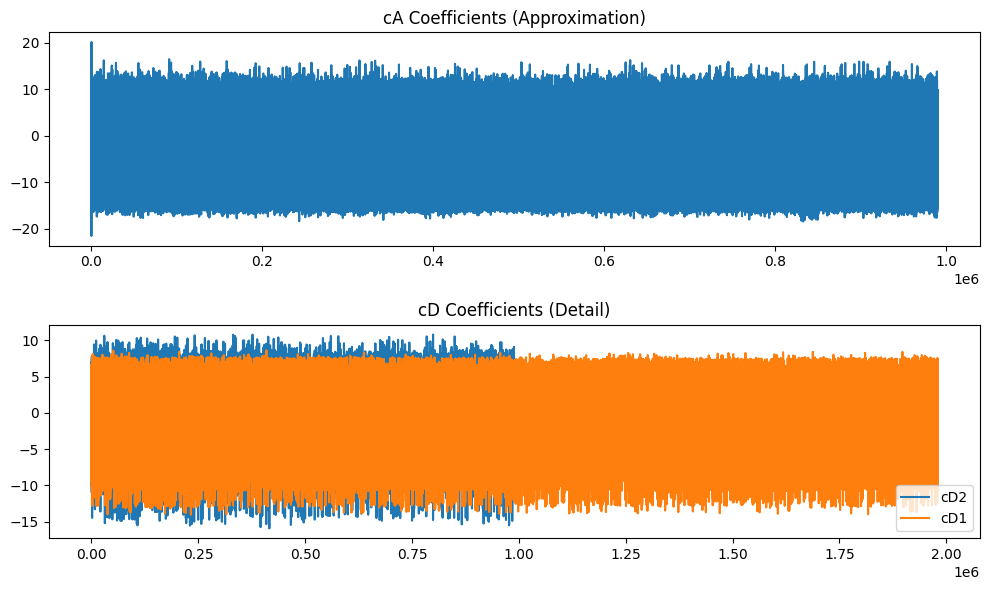

In [ ]:
import pandas as pd
import pywt
import matplotlib.pyplot as plt



# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Current J1'], wavelet, level)

# Extract cA and cD coefficients
cA, cD = coefficients[0], coefficients[1:]

# Visualize cA and cD coefficients using line plots
plt.figure(figsize=(10, 6))

# Plot cA (approximation coefficients)
plt.subplot(2, 1, 1)
plt.plot(cA)
plt.title('cA Coefficients (Approximation)')

# Plot cD (detail coefficients)
plt.subplot(2, 1, 2)
for i, cd in enumerate(cD):
    plt.plot(cd, label=f'cD{len(cD) - i}')
plt.legend()
plt.title('cD Coefficients (Detail)')

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'cA Coefficients (Approximation)')

<Axes: >

Text(0.5, 1.0, 'cD Coefficients (Detail)')

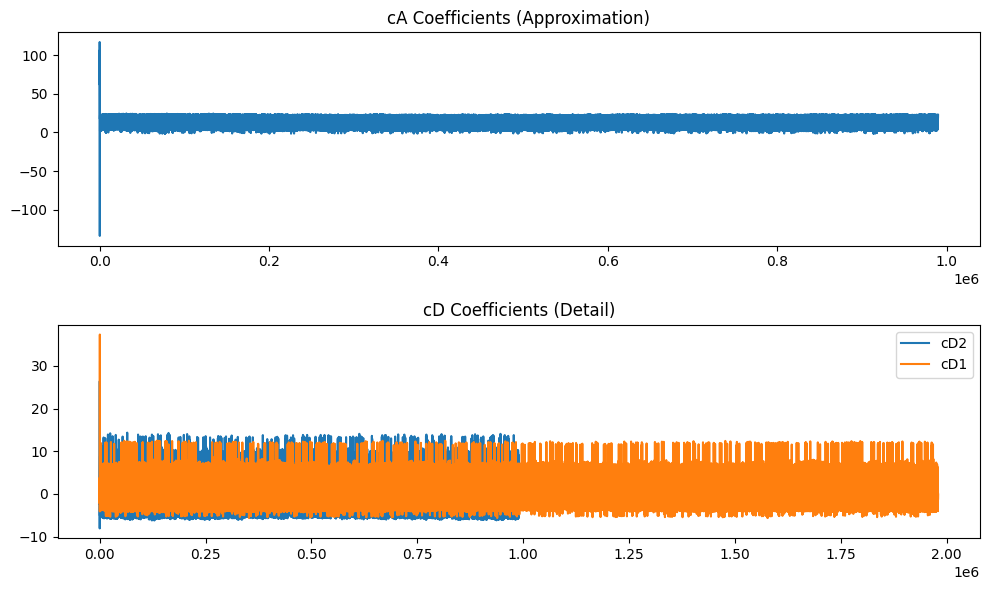

In [ ]:
import pandas as pd
import pywt
import matplotlib.pyplot as plt



# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Position J1'], wavelet, level)

# Extract cA and cD coefficients
cA, cD = coefficients[0], coefficients[1:]

# Visualize cA and cD coefficients using line plots
plt.figure(figsize=(10, 6))

# Plot cA (approximation coefficients)
plt.subplot(2, 1, 1)
plt.plot(cA)
plt.title('cA Coefficients (Approximation)')

# Plot cD (detail coefficients)
plt.subplot(2, 1, 2)
for i, cd in enumerate(cD):
    plt.plot(cd, label=f'cD{len(cD) - i}')
plt.legend()
plt.title('cD Coefficients (Detail)')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import pywt
import numpy as np
from scipy.stats import skew, kurtosis


# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Current J1'], wavelet, level)

# Extract cA and cD coefficients
cA, cD = coefficients[0], coefficients[1:]

# Initialize lists to store extracted statistics
mean_values = []
std_dev_values = []
skewness_values = []
kurtosis_values = []

# Calculate statistics for cA (approximation coefficients)
mean_values.append(np.mean(cA))
std_dev_values.append(np.std(cA))
skewness_values.append(skew(cA))
kurtosis_values.append(kurtosis(cA))

# Calculate statistics for cD (detail coefficients)
for i, cd in enumerate(cD):
    mean_values.append(np.mean(cd))
    std_dev_values.append(np.std(cd))
    skewness_values.append(skew(cd))
    kurtosis_values.append(kurtosis(cd))

# Create a DataFrame to store the statistics
statistics_df = pd.DataFrame({
    'Coefficient': ['cA'] + [f'cD{len(cD) - i}' for i in range(len(cD))],
    'Mean': mean_values,
    'Standard Deviation': std_dev_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
})

# Print or further analyze the statistics
print(statistics_df)


  Coefficient      Mean  Standard Deviation  Skewness   Kurtosis
0          cA -2.963740            4.755218 -0.472931   0.260374
1         cD2  0.000627            1.724480 -0.703490   6.599715
2         cD1 -0.000792            1.204699 -1.150599  16.055856


In [ ]:
import pandas as pd
import pywt
import numpy as np
from scipy.stats import skew, kurtosis


# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Position J1'], wavelet, level)

# Extract cA and cD coefficients
cA, cD = coefficients[0], coefficients[1:]

# Initialize lists to store extracted statistics
mean_values = []
std_dev_values = []
skewness_values = []
kurtosis_values = []

# Calculate statistics for cA (approximation coefficients)
mean_values.append(np.mean(cA))
std_dev_values.append(np.std(cA))
skewness_values.append(skew(cA))
kurtosis_values.append(kurtosis(cA))

# Calculate statistics for cD (detail coefficients)
for i, cd in enumerate(cD):
    mean_values.append(np.mean(cd))
    std_dev_values.append(np.std(cd))
    skewness_values.append(skew(cd))
    kurtosis_values.append(kurtosis(cd))

# Create a DataFrame to store the statistics
statistics_df = pd.DataFrame({
    'Coefficient': ['cA'] + [f'cD{len(cD) - i}' for i in range(len(cD))],
    'Mean': mean_values,
    'Standard Deviation': std_dev_values,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
})

# Print or further analyze the statistics
print(statistics_df)


  Coefficient       Mean  Standard Deviation   Skewness    Kurtosis
0          cA  17.592855            5.516918  -1.335788    9.053806
1         cD2   0.000428            0.499588  11.439116  297.367903
2         cD1   0.000179            0.314713  18.675528  769.953747


In [ ]:
import pandas as pd
import pywt
import numpy as np


# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Current J1'], wavelet, level)

# Extract cA and cD coefficients
cA, cD = coefficients[0], coefficients[1:]

# Define a threshold value (you can adjust this based on your data)
threshold = 0.5

# Apply thresholding to cD coefficients
thresholded_cD = [np.where(np.abs(cd) < threshold, 0, cd) for cd in cD]

# Reconstruct the denoised signal by combining cA and thresholded cD coefficients
denoised_signal = pywt.waverec([cA] + thresholded_cD, wavelet)

# Print the denoised signal
print(denoised_signal)


[-1.53 -1.53 -1.88 ... -7.1  -7.57 -7.57]


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Frequency (Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

Text(0.5, 1.0, 'Power Spectral Density (PSD) of cD Coefficients')

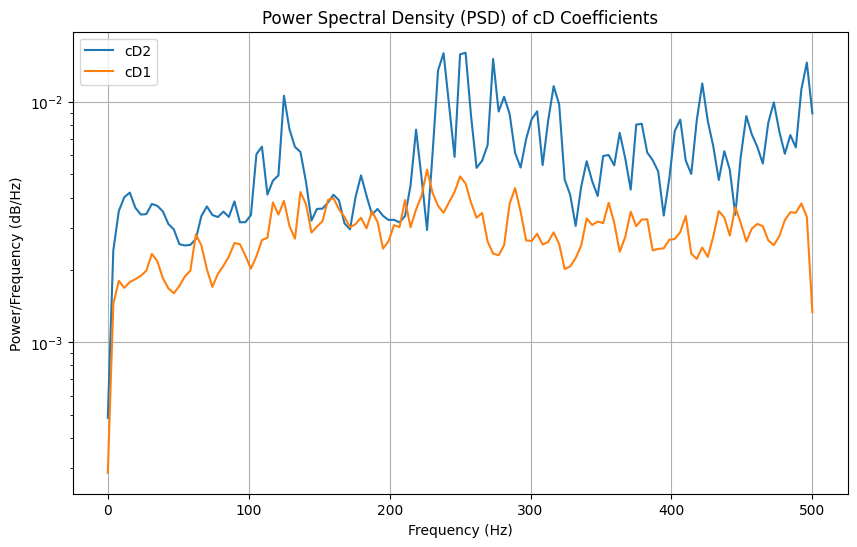

In [ ]:
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch



# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Current J1'], wavelet, level)

# Extract cD coefficients
cD = coefficients[1:]

# Choose a sampling frequency (you may need to set this based on your data)
sampling_frequency = 1000  # Example: 1000 Hz

# Calculate the PSD of the cD coefficients using Welch's method
psd_values = []
frequencies = []

for cd in cD:
    f, psd = welch(cd, fs=sampling_frequency)
    frequencies.append(f)
    psd_values.append(psd)

# Plot the PSD for each cD coefficient
plt.figure(figsize=(10, 6))

for i, (f, psd) in enumerate(zip(frequencies, psd_values)):
    plt.semilogy(f, psd, label=f'cD{len(cD) - i}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD) of cD Coefficients')
plt.legend()
plt.grid(True)

plt.show()


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Frequency (Hz)')

Text(0, 0.5, 'Power/Frequency (dB/Hz)')

Text(0.5, 1.0, 'Power Spectral Density (PSD) of cD Coefficients')

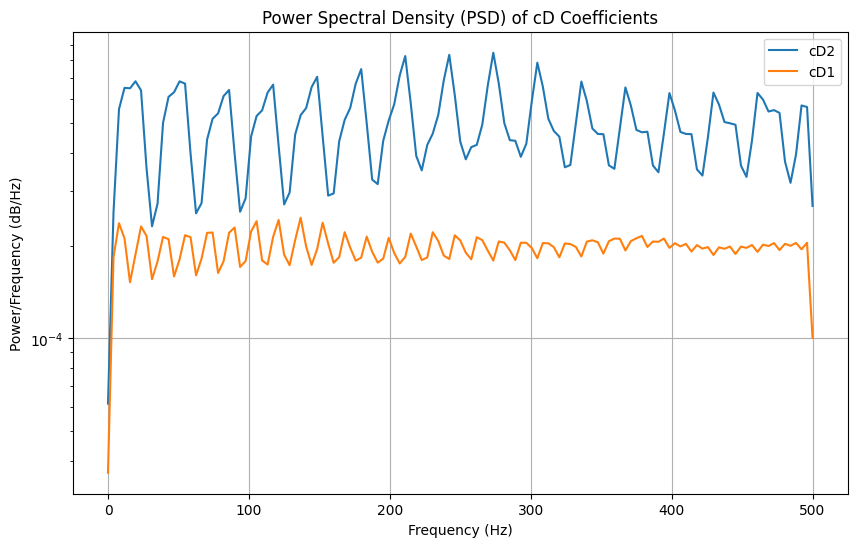

In [ ]:
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch



# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Position J1'], wavelet, level)

# Extract cD coefficients
cD = coefficients[1:]

# Choose a sampling frequency (you may need to set this based on your data)
sampling_frequency = 1000  # Example: 1000 Hz

# Calculate the PSD of the cD coefficients using Welch's method
psd_values = []
frequencies = []

for cd in cD:
    f, psd = welch(cd, fs=sampling_frequency)
    frequencies.append(f)
    psd_values.append(psd)

# Plot the PSD for each cD coefficient
plt.figure(figsize=(10, 6))

for i, (f, psd) in enumerate(zip(frequencies, psd_values)):
    plt.semilogy(f, psd, label=f'cD{len(cD) - i}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD) of cD Coefficients')
plt.legend()
plt.grid(True)

plt.show()


Text(0.5, 0, 'Feature 1')

Text(0.5, 1.0, 'K-Means Clustering (K=3)')

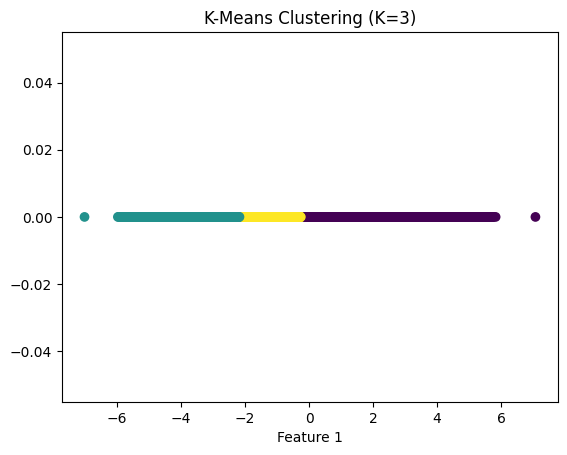

Cluster Centers:
[[ 0.37830754]
 [-3.38226964]
 [-0.85459304]]
Cluster Labels:
[2 1 2 ... 0 0 0]


In [ ]:
import pandas as pd
import pywt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Current J1'], wavelet, level)

# Extract cA and cD coefficients
cA, cD = coefficients[0], coefficients[1:]

# Combine cA and cD coefficients into a feature matrix
X = np.hstack([cA] + cD).T

# Reshape X to a 2D array (required for StandardScaler)
X = X.reshape(-1, 1)

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you can adjust this based on your data)
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Visualize the clusters (for 2D data, you may need to reduce dimensions for higher dimensions)
plt.scatter(X_scaled[:, 0], np.zeros_like(X_scaled[:, 0]), c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.title(f'K-Means Clustering (K={num_clusters})')
plt.show()

# You can also access cluster centers and labels
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

print("Cluster Centers:")
print(cluster_centers)
print("Cluster Labels:")
print(cluster_labels)


Text(0.5, 0, 'Feature 1')

Text(0.5, 1.0, 'K-Means Clustering (K=3)')

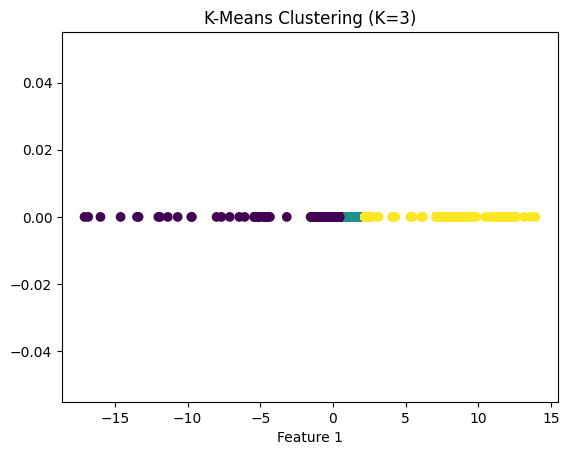

Cluster Centers:
[[-0.51640235]
 [ 1.69654234]
 [ 2.23192583]]
Cluster Labels:
[2 2 2 ... 0 0 0]


In [ ]:
import pandas as pd
import pywt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Position J1'], wavelet, level)

# Extract cA and cD coefficients
cA, cD = coefficients[0], coefficients[1:]

# Combine cA and cD coefficients into a feature matrix
X = np.hstack([cA] + cD).T

# Reshape X to a 2D array (required for StandardScaler)
X = X.reshape(-1, 1)

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you can adjust this based on your data)
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Visualize the clusters (for 2D data, you may need to reduce dimensions for higher dimensions)
plt.scatter(X_scaled[:, 0], np.zeros_like(X_scaled[:, 0]), c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.title(f'K-Means Clustering (K={num_clusters})')
plt.show()

# You can also access cluster centers and labels
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

print("Cluster Centers:")
print(cluster_centers)
print("Cluster Labels:")
print(cluster_labels)


Text(0.5, 0, 'Feature 1')

Text(0.5, 1.0, 'K-Means Clustering (K=3)')

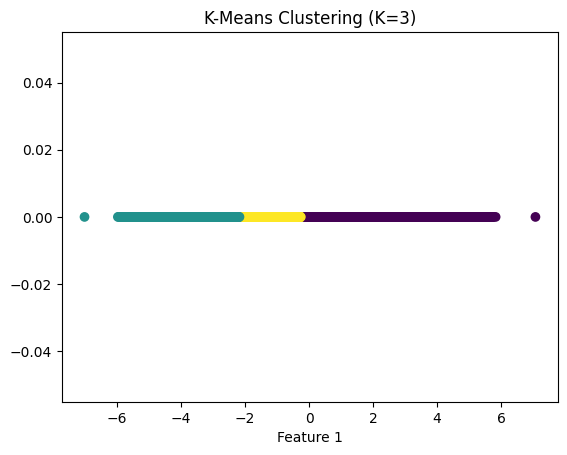

Cluster Centers:
[[ 0.37830754]
 [-3.38226964]
 [-0.85459304]]
Cluster Labels:
[2 1 2 ... 0 0 0]


In [ ]:
import pandas as pd
import pywt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Current J1'], wavelet, level)

# Extract cA and cD coefficients
cA, cD = coefficients[0], coefficients[1:]

# Combine cA and cD coefficients into a feature matrix
X = np.hstack([cA] + cD).T

# Reshape X to a 2D array (required for StandardScaler)
X = X.reshape(-1, 1)

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you can adjust this based on your data)
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(X_scaled[:, 0], np.zeros_like(X_scaled[:, 0]), c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.title(f'K-Means Clustering (K={num_clusters})')
plt.show()

# You can also access cluster centers and labels
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

print("Cluster Centers:")
print(cluster_centers)
print("Cluster Labels:")
print(cluster_labels)


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Sample Number')

Text(0, 0.5, 'Current J1')

Text(0.5, 1.0, 'Change Detection using CUSUM')

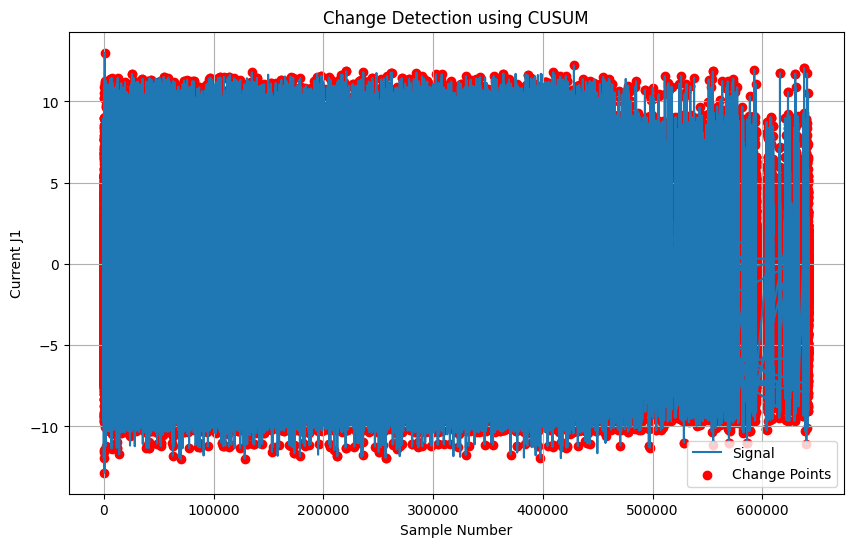

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset (replace 'path' with your actual data file)
df = pd.read_csv(path)

# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Current J1'], wavelet, level)

# Extract cA and cD coefficients
cA, cD = coefficients[0], coefficients[1:]

# Combine cA and cD coefficients into a feature matrix
X = np.hstack([cA] + cD).T

# Set the change detection threshold (you can adjust this based on your data)
threshold = 2.0

# Initialize the CUSUM algorithm
cusum = np.zeros(len(X))
change_points = []

# Apply the CUSUM algorithm to detect changes
for i in range(1, len(X)):
    cusum[i] = max(0, cusum[i - 1] + abs(X[i] - X[i - 1]) - threshold)
    if cusum[i] > threshold:
        # Ensure that the detected change point is within the valid index range
        if i < len(df):
            change_points.append(i)

# Visualize the signal and detected change points
plt.figure(figsize=(10, 6))
plt.plot(df['SNo'], df['Current J1'], label='Signal')
plt.scatter(df['SNo'][change_points], df['Current J1'][change_points], color='red', marker='o', label='Change Points')
plt.xlabel('Sample Number')
plt.ylabel('Current J1')
plt.legend()
plt.title('Change Detection using CUSUM')
plt.grid(True)
plt.show()

print("Detected Change Points:")
print(change_points)


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Sample Number')

Text(0, 0.5, 'Position J1')

Text(0.5, 1.0, 'Change Detection using CUSUM')

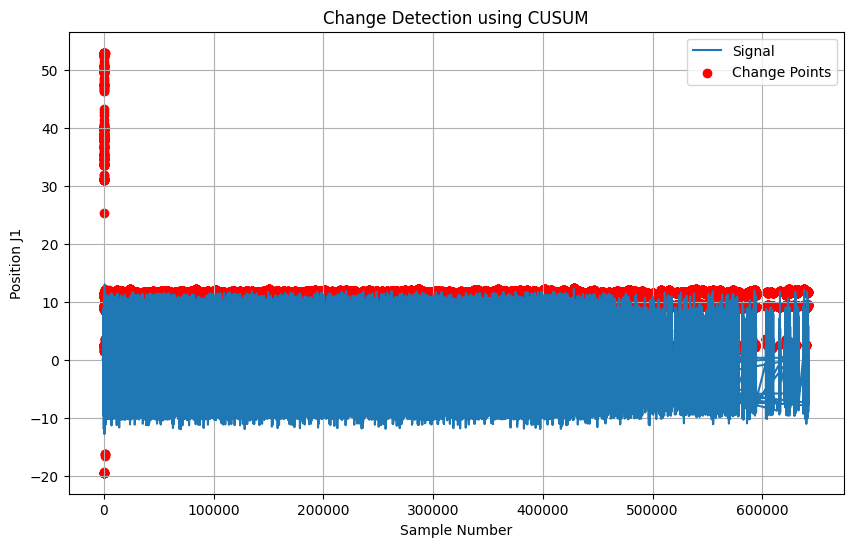

Detected Change Points:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 73, 74, 75, 76, 77, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 2

In [ ]:
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset (replace 'path' with your actual data file)
df = pd.read_csv(path)

# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Position J1'], wavelet, level)

# Extract cA and cD coefficients
cA, cD = coefficients[0], coefficients[1:]

# Combine cA and cD coefficients into a feature matrix
X = np.hstack([cA] + cD).T

# Set the change detection threshold (you can adjust this based on your data)
threshold = 2.0

# Initialize the CUSUM algorithm
cusum = np.zeros(len(X))
change_points = []

# Apply the CUSUM algorithm to detect changes
for i in range(1, len(X)):
    cusum[i] = max(0, cusum[i - 1] + abs(X[i] - X[i - 1]) - threshold)
    if cusum[i] > threshold:
        # Ensure that the detected change point is within the valid index range
        if i < len(df):
            change_points.append(i)

# Visualize the signal and detected change points
plt.figure(figsize=(10, 6))
plt.plot(df['SNo'], df['Current J1'], label='Signal')
plt.scatter(df['SNo'][change_points], df['Position J1'][change_points], color='red', marker='o', label='Change Points')
plt.xlabel('Sample Number')
plt.ylabel('Position J1')
plt.legend()
plt.title('Change Detection using CUSUM')
plt.grid(True)
plt.show()

print("Detected Change Points:")
print(change_points)


<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Sample Number')

Text(0, 0.5, 'Current J1')

Text(0.5, 1.0, 'Change Detection using CUSUM')

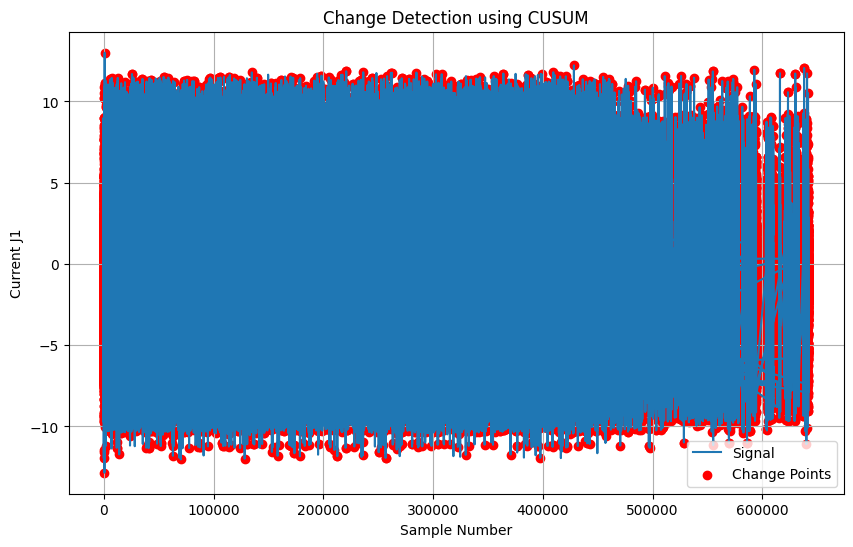

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import pandas as pd
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Choose the wavelet family and level of decomposition
wavelet = 'haar'  # You can choose a different wavelet family if needed
level = 2

# Define a function to perform the wavelet transform
def wavelet_transform(data_column, wavelet_name, decomposition_level):
    coeffs = pywt.wavedec(data_column, wavelet_name, level=decomposition_level)
    return coeffs

# Perform the wavelet transform on 'Current J1' column
coefficients = wavelet_transform(df['Current J1'], wavelet, level)

# Extract cA and cD coefficients
cA, cD = coefficients[0], coefficients[1:]

# Combine cA and cD coefficients into a feature matrix
X = np.hstack([cA] + cD).T

# Set the change detection threshold (you can adjust this based on your data)
threshold = 2.0

# Initialize the CUSUM algorithm
cusum = np.zeros(len(X))
change_points = []

# Apply the CUSUM algorithm to detect changes
for i in range(1, len(X)):
    cusum[i] = max(0, cusum[i - 1] + abs(X[i] - X[i - 1]) - threshold)
    if cusum[i] > threshold:
        change_points.append(i)

# Visualize the signal and detected change points
plt.figure(figsize=(10, 6))
plt.plot(df['SNo'], df['Current J1'], label='Signal')
change_points = [point - 1 for point in change_points]  # Adjust for 0-based indexing
plt.scatter(df['SNo'].iloc[change_points], df['Current J1'].iloc[change_points], color='red', marker='o', label='Change Points')
plt.xlabel('Sample Number')
plt.ylabel('Current J1')
plt.legend()
plt.title('Change Detection using CUSUM')
plt.grid(True)
plt.show()

print("Detected Change Points:")
print(change_points)


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Date', ylabel='Current J1'>

<Axes: xlabel='Date', ylabel='Current J1'>

(array([19530., 19539., 19546., 19553., 19560., 19570.]),
 [Text(19530.0, 0, '2023-06-22 00:00:00'),
  Text(19539.0, 0, '2023-07-01 00:00:00'),
  Text(19546.0, 0, '2023-07-08 00:00:00'),
  Text(19553.0, 0, '2023-07-15 00:00:00'),
  Text(19560.0, 0, '2023-07-22 00:00:00'),
  Text(19570.0, 0, '2023-08-01 00:00:00')])

Text(0.5, 0, 'Date and Time')

Text(0, 0.5, 'Metric Value')

Text(0.5, 1.0, 'Performance Metrics Over Time')

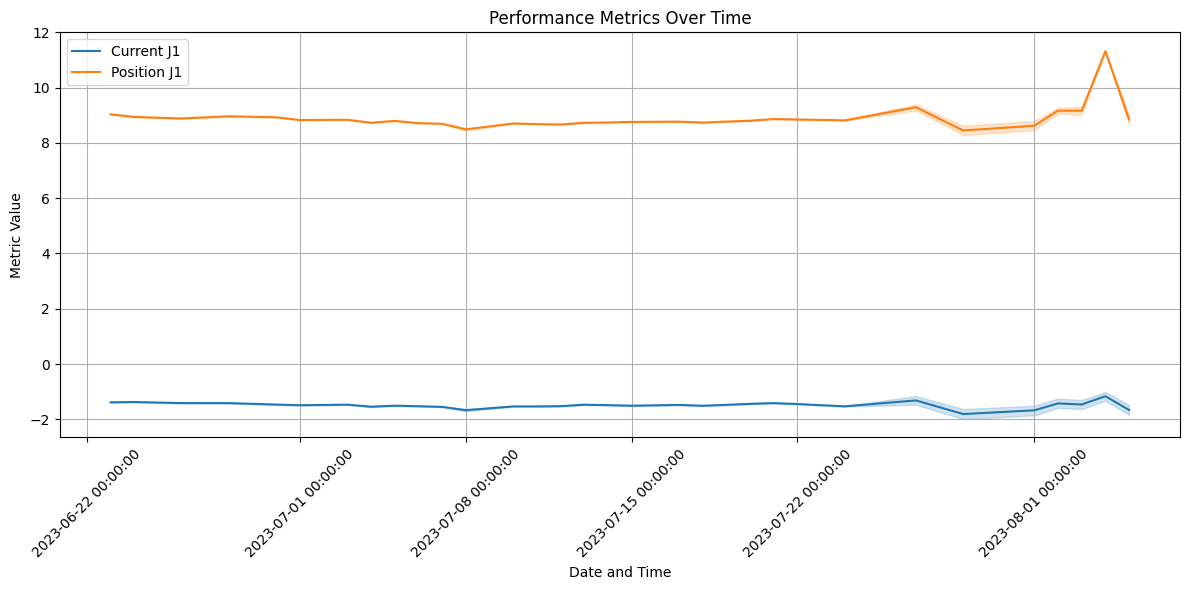

In [ ]:
#Visualize the performance metrics (e.g., Current J1, Position J1) over time to identify patterns or variations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mdates

# Assuming 'Date' is your time-related column (if not, replace it with the correct one)
# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a figure and axis
plt.figure(figsize=(12, 6))
ax = plt.gca()

# Plot the performance metrics over time
sns.lineplot(data=df, x='Date', y='Current J1', label='Current J1', ax=ax)
sns.lineplot(data=df, x='Date', y='Position J1', label='Position J1', ax=ax)

# Format the date and time on the x-axis
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.xlabel('Date and Time')
plt.ylabel('Metric Value')
plt.title('Performance Metrics Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()


<Figure size 1200x1000 with 0 Axes>

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

<BarContainer object of 2 artists>

Text(0.5, 0, 'Metric')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Summary of Performance Metrics')

([0, 1], [Text(0, 0, 'Current J1'), Text(1, 0, 'Position J1')])

Summary of Performance Metrics:
        Metric      Mean  Standard Deviation  Minimum  Maximum  Skewness  \
0   Current J1 -1.481867            2.668730   -12.85    13.00 -0.168739   
1  Position J1  8.796426            2.778672   -67.80    58.84 -1.354974   

   Kurtosis  
0  0.559412  
1  8.995112  


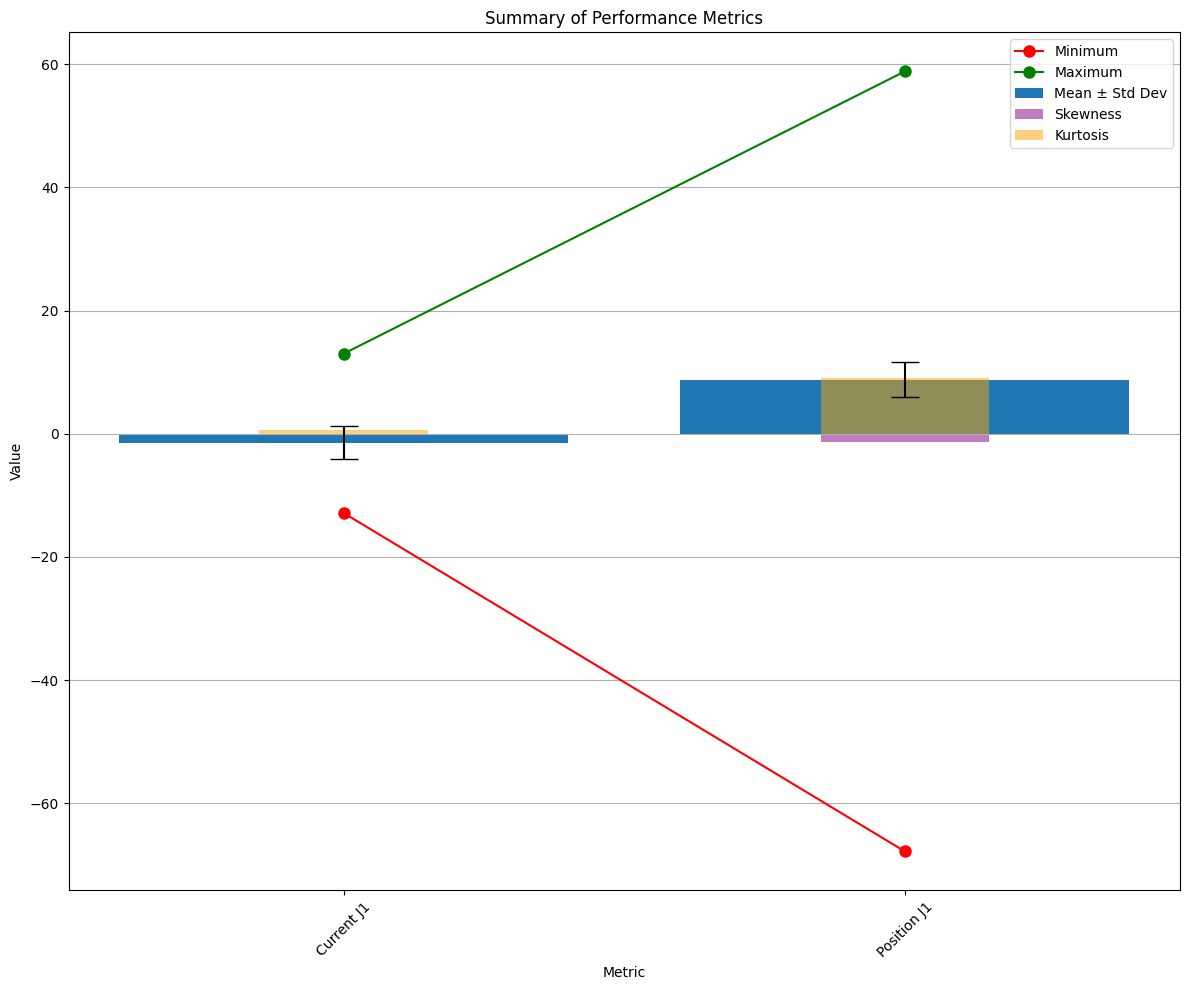

In [ ]:
#Use statistical measures (mean, standard deviation, etc.) to summarize the performance metrics and look for trends
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


# Calculate statistical measures for 'Current J1' and 'Position J1'
current_j1_mean = df['Current J1'].mean()
current_j1_std = df['Current J1'].std()
current_j1_min = df['Current J1'].min()
current_j1_max = df['Current J1'].max()
current_j1_skewness = skew(df['Current J1'])
current_j1_kurtosis = kurtosis(df['Current J1'])

position_j1_mean = df['Position J1'].mean()
position_j1_std = df['Position J1'].std()
position_j1_min = df['Position J1'].min()
position_j1_max = df['Position J1'].max()
position_j1_skewness = skew(df['Position J1'])
position_j1_kurtosis = kurtosis(df['Position J1'])

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Metric': ['Current J1', 'Position J1'],
    'Mean': [current_j1_mean, position_j1_mean],
    'Standard Deviation': [current_j1_std, position_j1_std],
    'Minimum': [current_j1_min, position_j1_min],
    'Maximum': [current_j1_max, position_j1_max],
    'Skewness': [current_j1_skewness, position_j1_skewness],
    'Kurtosis': [current_j1_kurtosis, position_j1_kurtosis]
})

# Plot mean, standard deviation, skewness, and kurtosis using a bar chart
plt.figure(figsize=(12, 10))
plt.bar(summary_df['Metric'], summary_df['Mean'], yerr=summary_df['Standard Deviation'], capsize=10, label='Mean ± Std Dev')
plt.plot(summary_df['Metric'], summary_df['Minimum'], 'ro-', label='Minimum', markersize=8)
plt.plot(summary_df['Metric'], summary_df['Maximum'], 'go-', label='Maximum', markersize=8)
plt.bar(summary_df['Metric'], summary_df['Skewness'], alpha=0.5, label='Skewness', color='purple', width=0.3)
plt.bar(summary_df['Metric'], summary_df['Kurtosis'], alpha=0.5, label='Kurtosis', color='orange', width=0.3)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Summary of Performance Metrics')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()

# Show the summary DataFrame
print("Summary of Performance Metrics:")
print(summary_df)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'Date' is your time-related column (if not, replace it with the correct one)
# Convert 'Date' column to datetime if it's not already in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Select the 'Current J1' column as a time series
time_series = df[['Date', 'Current J1']]
time_series.set_index('Date', inplace=True)

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series['Current J1'], label='Original Time Series')
plt.xlabel('Date')
plt.ylabel('Current J1')
plt.title('Original Time Series')
plt.grid(True)

# Perform Fast Fourier Transform (FFT) to detect periodic patterns
fft_result = np.fft.fft(time_series['Current J1'])
fft_freqs = np.fft.fftfreq(len(time_series), 1)  # Frequency values corresponding to FFT components

# Identify dominant frequencies and their amplitudes
dominant_frequencies = fft_freqs[np.argsort(np.abs(fft_result))[::-1][:5]]  # Top 5 dominant frequencies
dominant_amplitudes = np.abs(fft_result[np.argsort(np.abs(fft_result))[::-1][:5]])  # Corresponding amplitudes

# Plot the FFT results
plt.figure(figsize=(12, 6))
plt.plot(fft_freqs, np.abs(fft_result), label='FFT Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Amplitude Spectrum')
plt.grid(True)

# Print dominant frequencies and their amplitudes
print("Dominant Frequencies (Hz):", dominant_frequencies)
print("Corresponding Amplitudes:", dominant_amplitudes)

# Perform autocorrelation to detect periodicity
autocorrelation = time_series['Current J1'].autocorr()
print("Autocorrelation:", autocorrelation)

# Plot the autocorrelation function
plt.figure(figsize=(12, 6))
plt.acorr(time_series['Current J1'], maxlags=len(time_series) - 1, label='Autocorrelation')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.grid(True)

# Show the plots
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J1')

Text(0.5, 1.0, 'Original Time Series')

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Frequency (Hz)')

Text(0, 0.5, 'Amplitude')

Text(0.5, 1.0, 'FFT Amplitude Spectrum')

Dominant Frequencies (Hz): [ 0.         -0.00112191  0.00112191 -0.00224383  0.00224383]
Corresponding Amplitudes: [5867158.17       1179341.82317628 1179341.82317628  938769.93019514
  938769.93019514]
Autocorrelation: 0.7961441369143879


<Figure size 1200x600 with 0 Axes>

#EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print(df.describe())


# Pairwise correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Distribution of numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
numeric_cols.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplots for numeric columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_cols, orient="h")
plt.title('Boxplots of Numeric Columns')
plt.show()

# Distribution of categorical columns (e.g., Position J1)
categorical_cols = df.select_dtypes(include='object')
for col in categorical_cols.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

# Time Series Analysis (assuming "Date" is a datetime column)
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Current J1'], label='Current J1', marker='o')
plt.xlabel('Date')
plt.ylabel('Current J1')
plt.title('Time Series Analysis of Current J1')
plt.legend()
plt.grid(True)
plt.show()


NameError: ignored

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J1')

Text(0.5, 1.0, 'Time Series Analysis of Current J1')

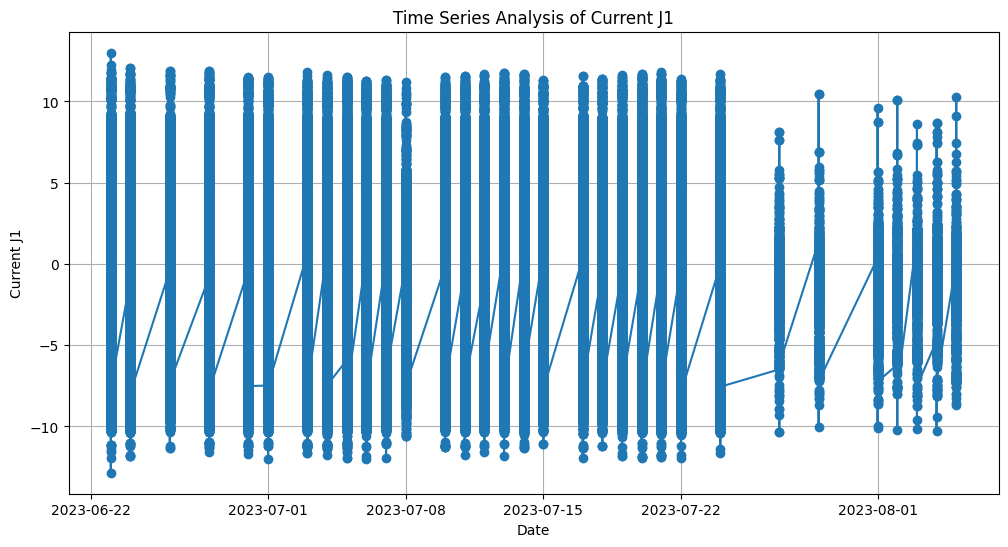

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J2')

Text(0.5, 1.0, 'Time Series Analysis of Current J2')

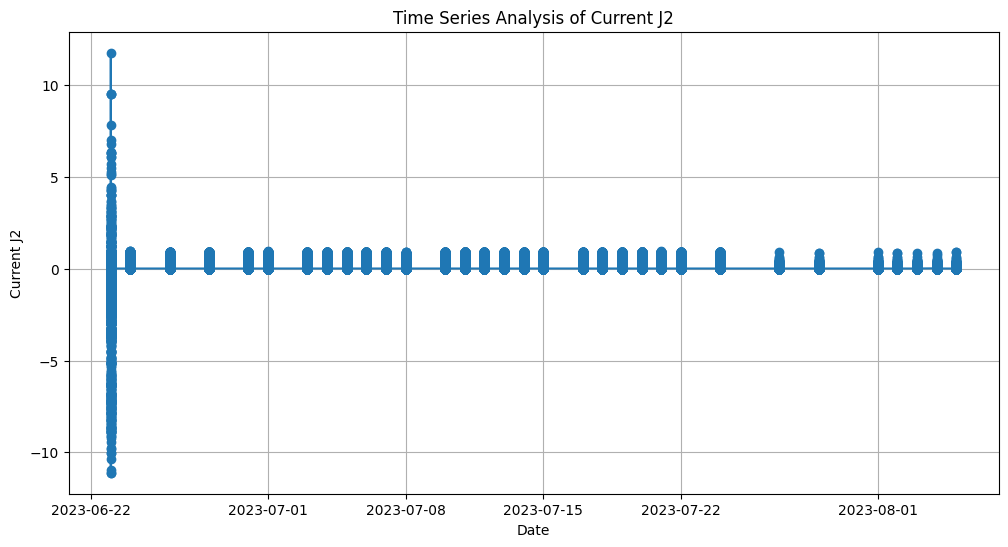

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J3')

Text(0.5, 1.0, 'Time Series Analysis of Current J3')

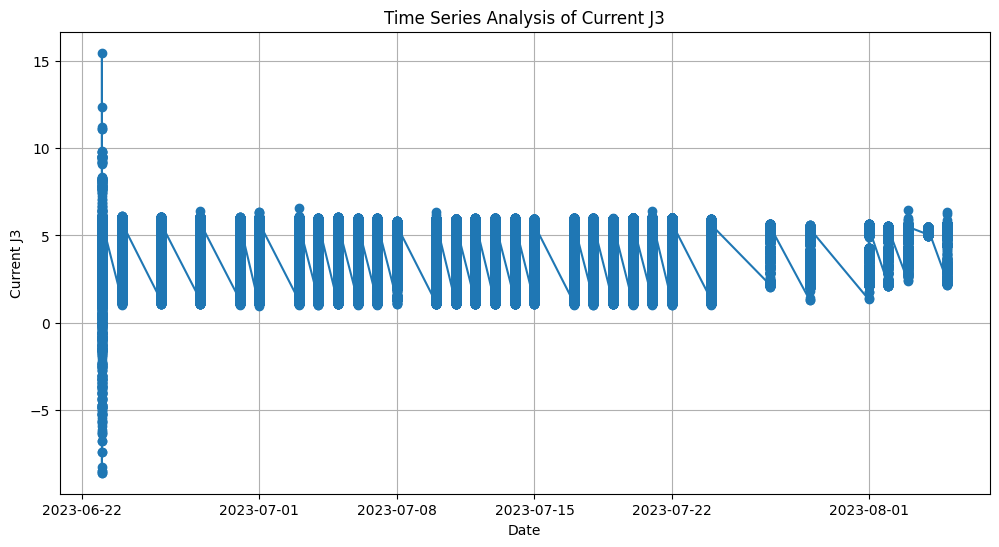

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J4')

Text(0.5, 1.0, 'Time Series Analysis of Current J4')

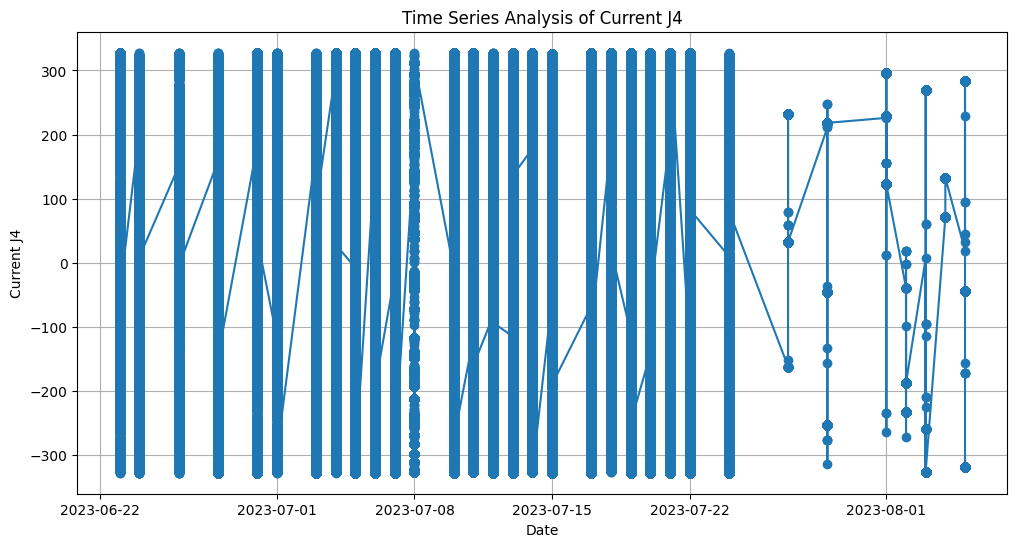

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J5')

Text(0.5, 1.0, 'Time Series Analysis of Current J5')

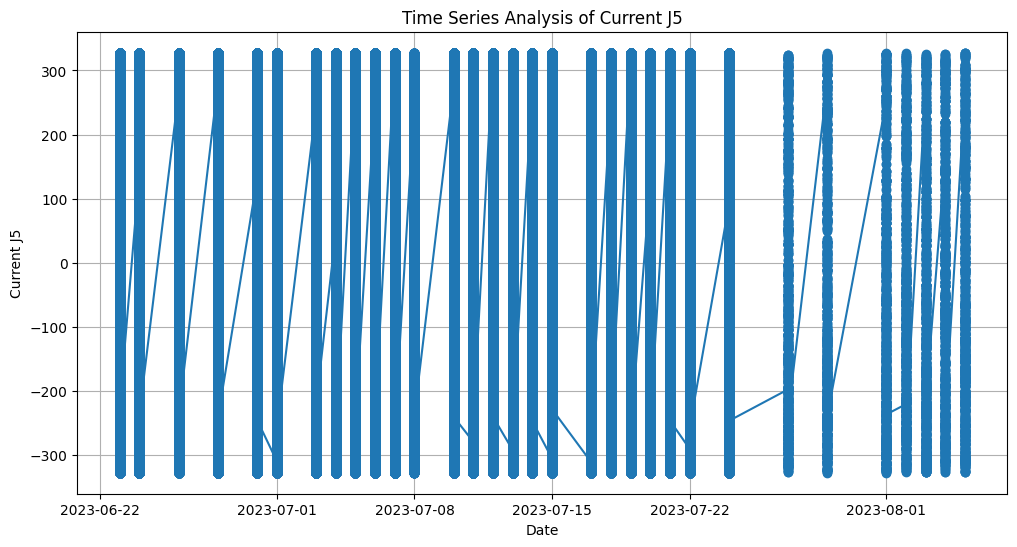

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Current J6')

Text(0.5, 1.0, 'Time Series Analysis of Current J6')

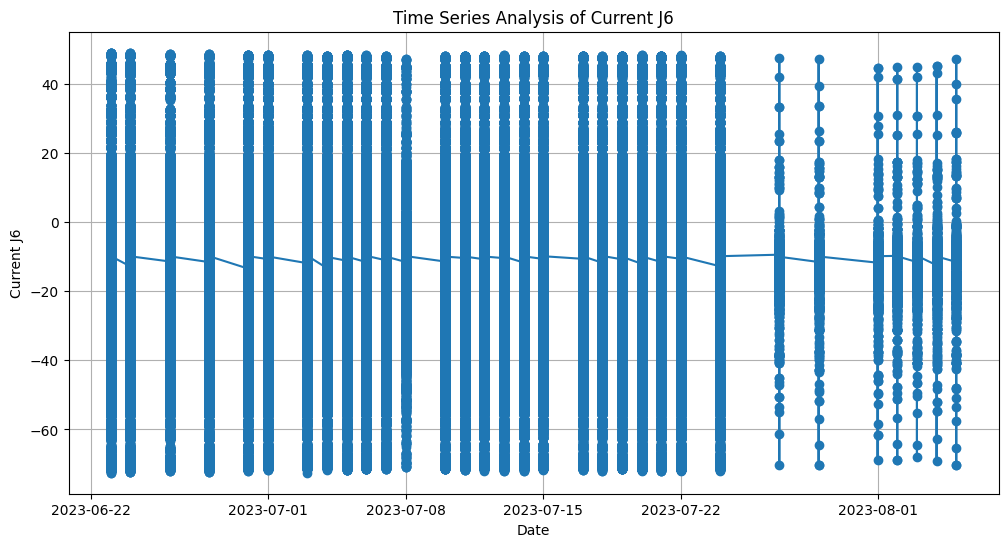

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# List of columns you want to analyze
columns_to_analyze = [
    'Current J1', 'Current J2', 'Current J3',
    'Current J4', 'Current J5', 'Current J6'
]

# Plot time series for each specified column
for column in columns_to_analyze:
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[column], marker='o')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Time Series Analysis of {column}')
    plt.grid(True)
    plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Position J1')

Text(0.5, 1.0, 'Time Series Analysis of Position J1')

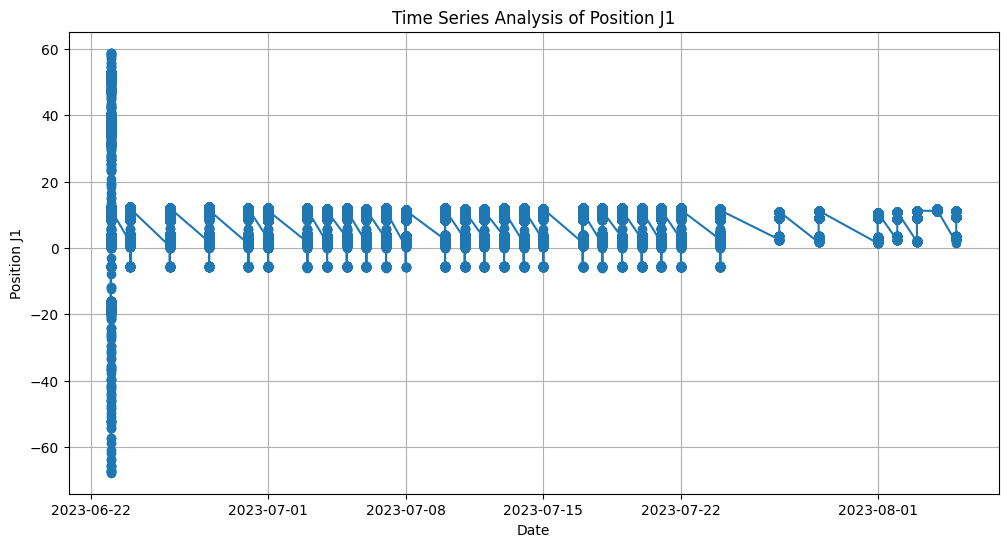

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Position J2')

Text(0.5, 1.0, 'Time Series Analysis of Position J2')

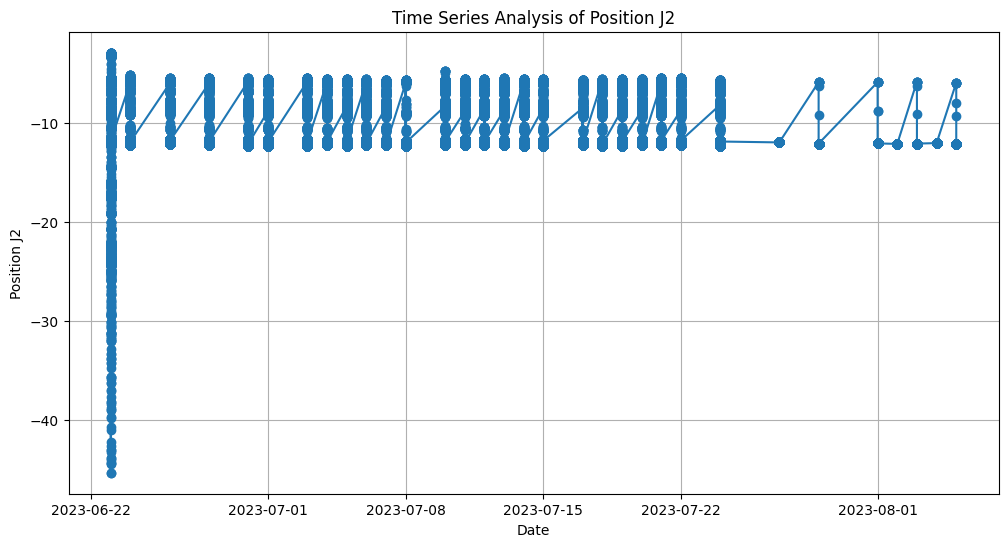

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Position J3')

Text(0.5, 1.0, 'Time Series Analysis of Position J3')

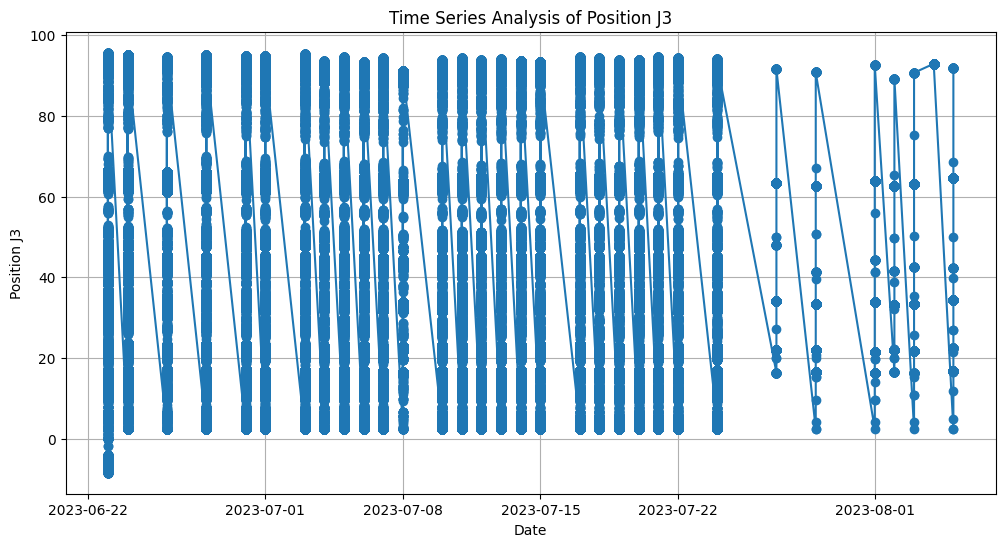

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Position J4')

Text(0.5, 1.0, 'Time Series Analysis of Position J4')

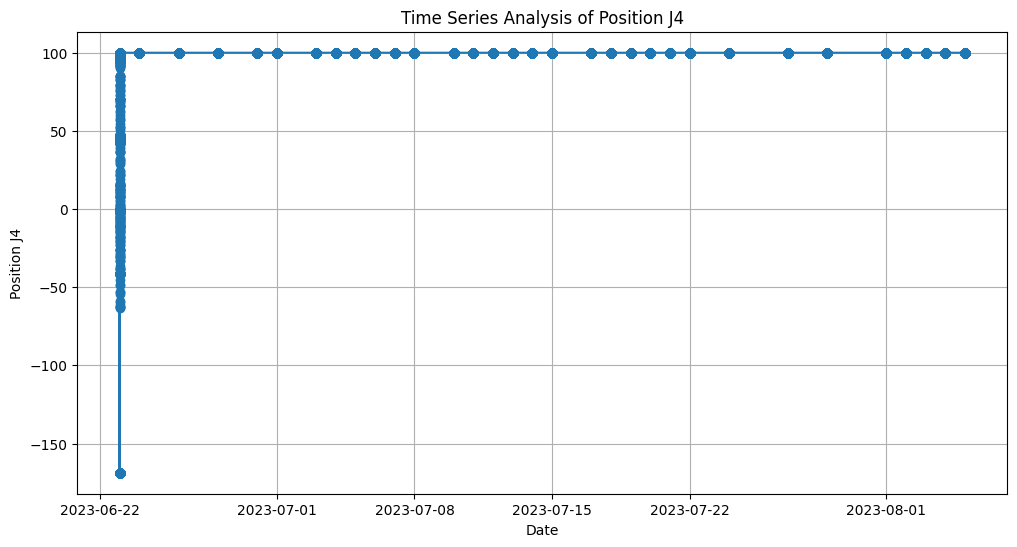

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Position J5')

Text(0.5, 1.0, 'Time Series Analysis of Position J5')

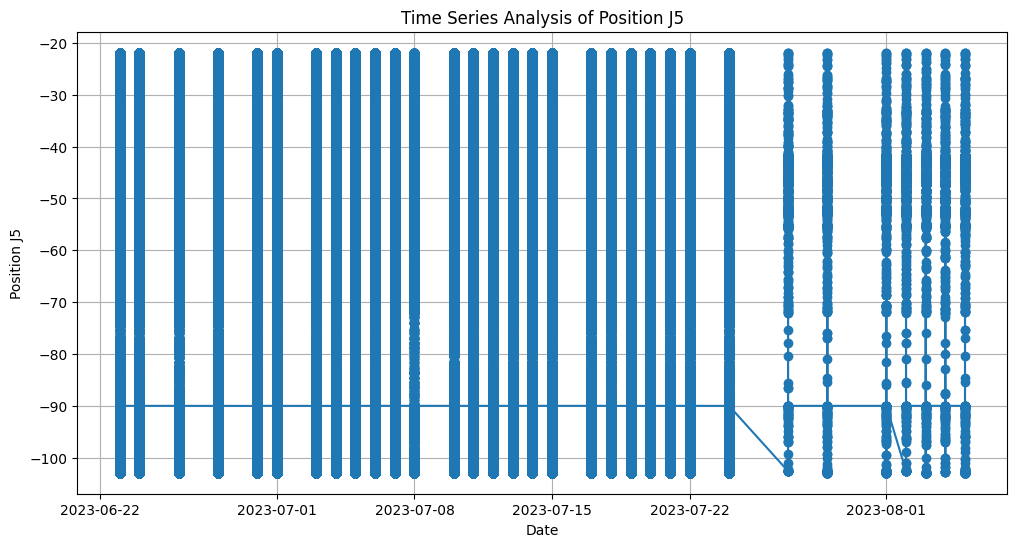

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Position J6')

Text(0.5, 1.0, 'Time Series Analysis of Position J6')

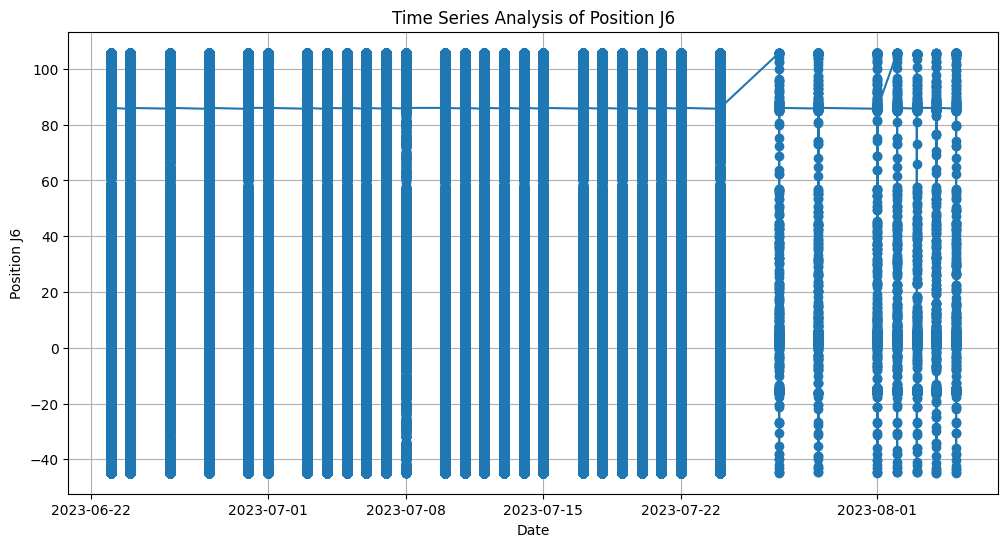

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])

# List of Position columns you want to analyze
position_columns = [
    'Position J1', 'Position J2', 'Position J3',
    'Position J4', 'Position J5', 'Position J6'
]

# Plot time series for each specified Position column
for column in position_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[column], marker='o')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Time Series Analysis of {column}')
    plt.grid(True)
    plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current and Position for J1')

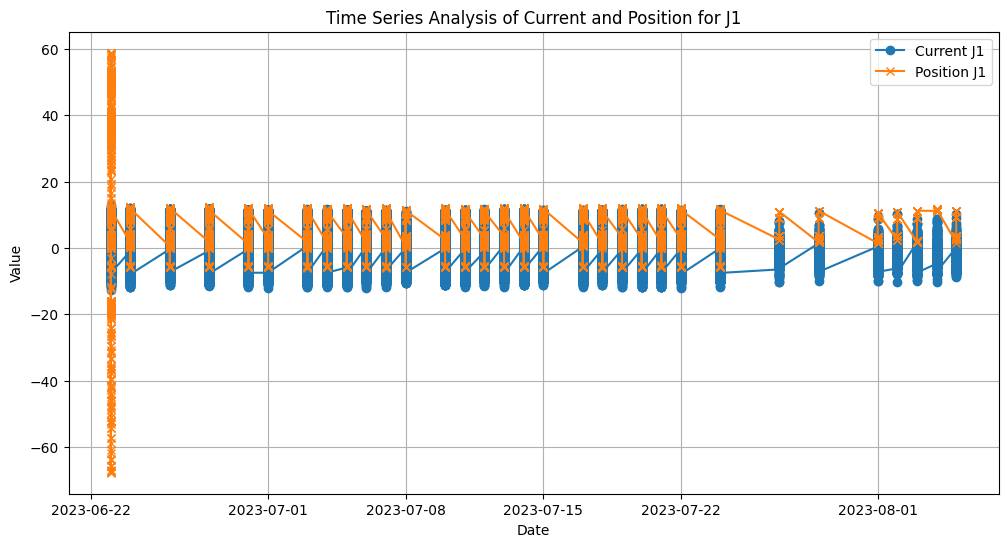

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current and Position for J2')

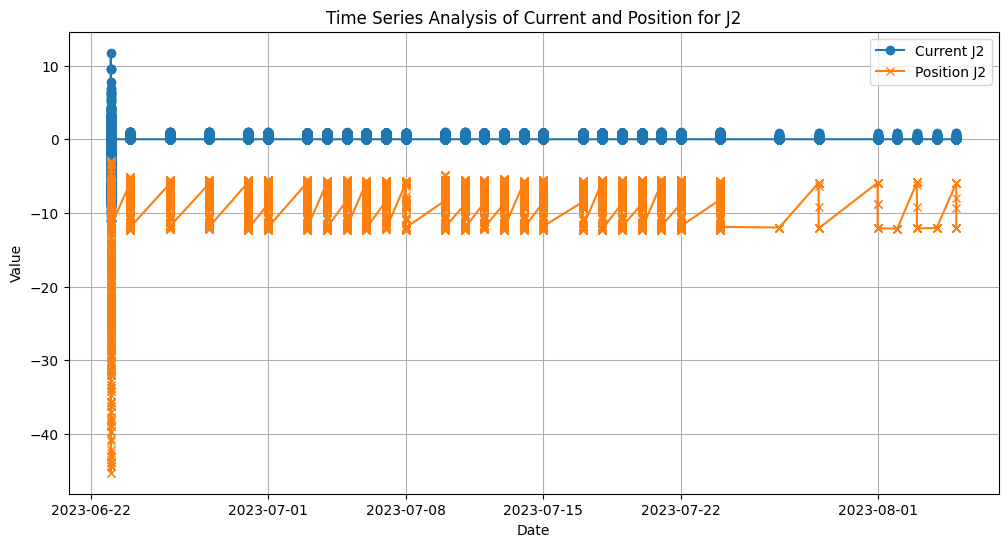

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current and Position for J3')

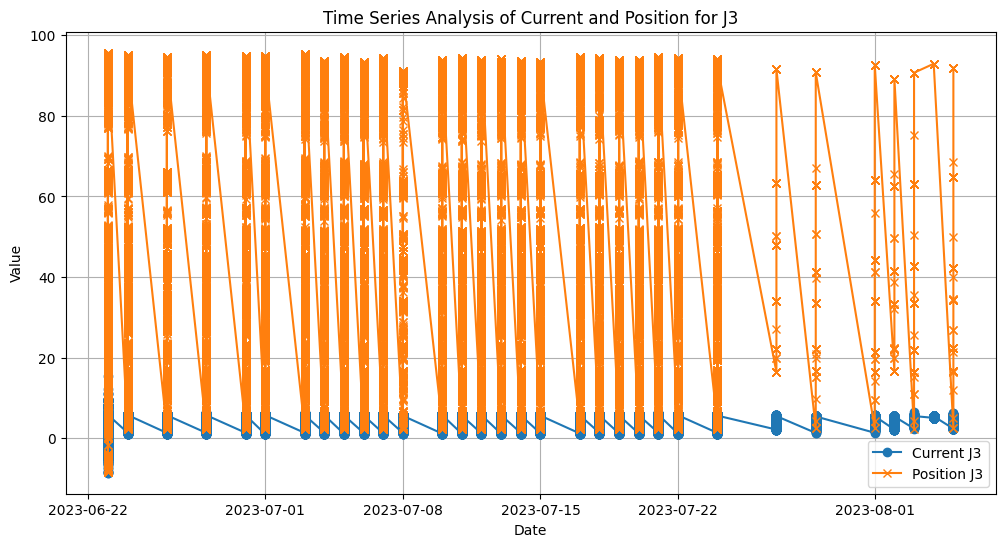

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current and Position for J4')

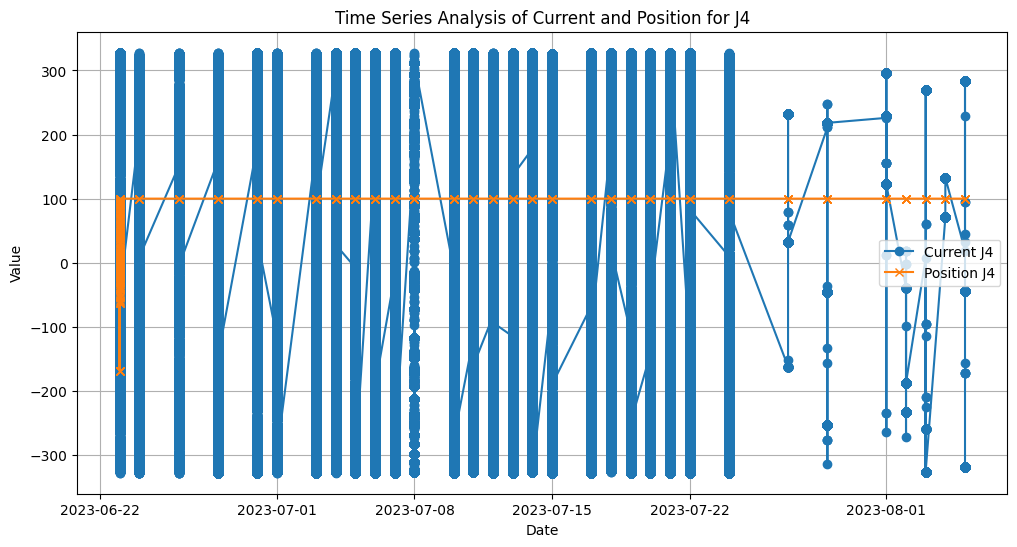

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current and Position for J5')

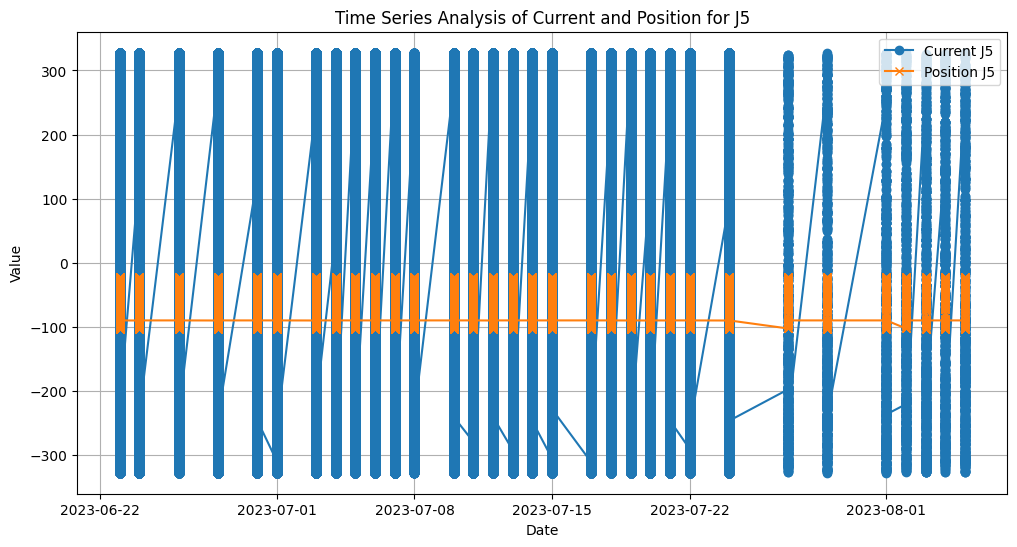

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current and Position for J6')

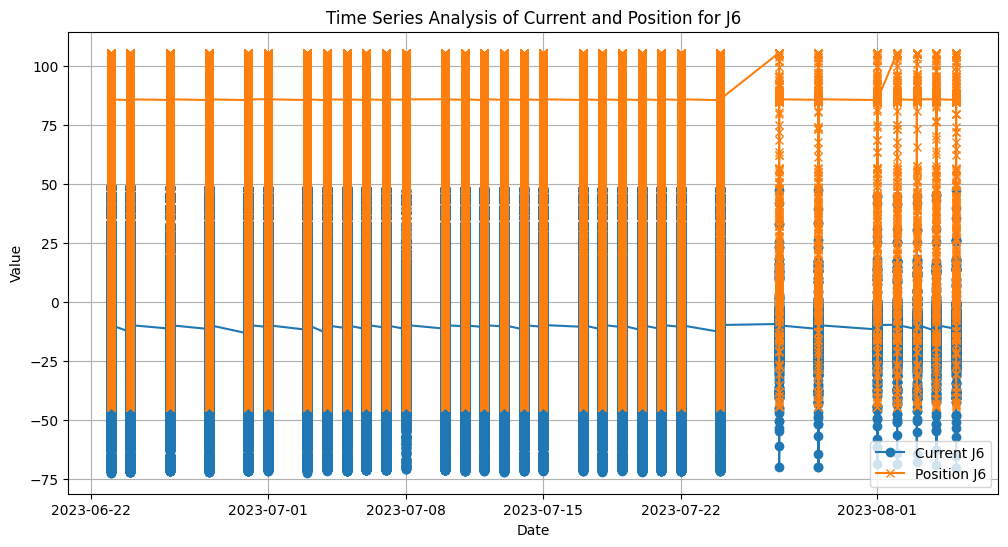

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# List of J columns you want to analyze
j_columns = ['J1', 'J2', 'J3', 'J4', 'J5', 'J6']

# Create paired time series plots for Current and Position columns
for j in j_columns:
    current_column = f'Current {j}'
    position_column = f'Position {j}'

    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[current_column], label=f'Current {j}', marker='o')
    plt.plot(df['Date'], df[position_column], label=f'Position {j}', marker='x')

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Time Series Analysis of Current and Position for {j}')
    plt.legend()
    plt.grid(True)
    plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Current for All J Columns')

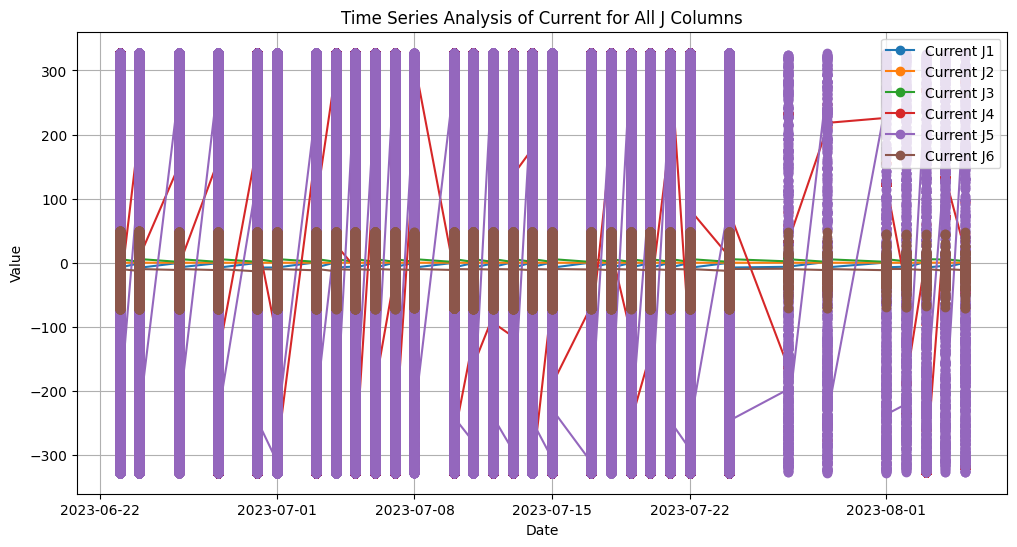

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

# List of J columns you want to analyze
j_columns = ['J1', 'J2', 'J3', 'J4', 'J5', 'J6']

# Create a single graph for all "Current J" columns
plt.figure(figsize=(12, 6))

for j in j_columns:
    current_column = f'Current {j}'
    plt.plot(df['Date'], df[current_column], label=f'Current {j}', marker='o')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Analysis of Current for All J Columns')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Time Series Analysis of Position for All J Columns')

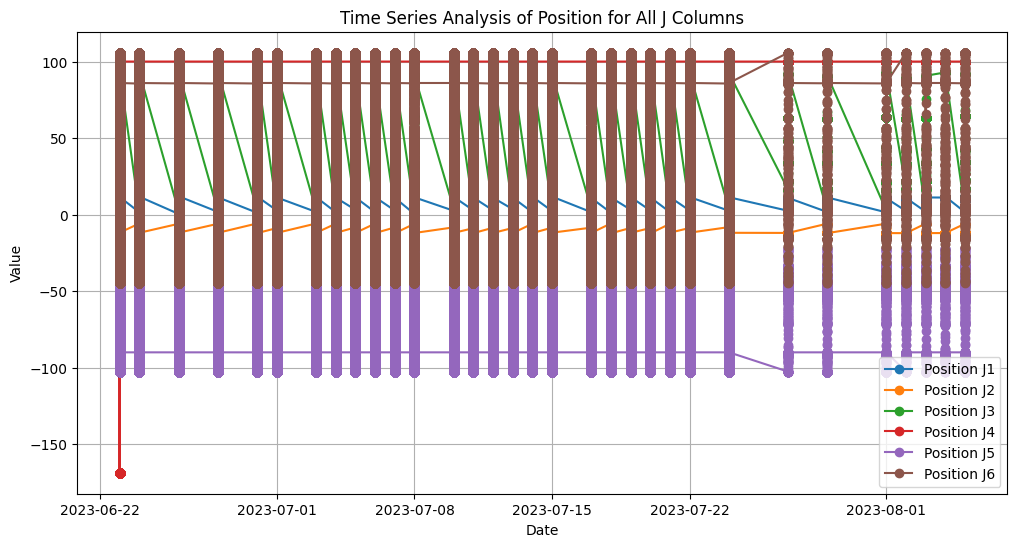

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])

# List of J columns you want to analyze
j_columns = ['J1', 'J2', 'J3', 'J4', 'J5', 'J6']

# Create a single graph for all "Position J" columns
plt.figure(figsize=(12, 6))

for j in j_columns:
    position_column = f'Position {j}'
    plt.plot(df['Date'], df[position_column], label=f'Position {j}', marker='o')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Analysis of Position for All J Columns')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df.tail()

Current J1  Position J1  Current J2  Position J2  Current J3  \
1048570         0.0        14.71         0.0       -17.26       11.11   
1048571         0.0        14.71         0.0       -17.26       11.11   
1048572         0.0        14.71         0.0       -17.26       11.11   
1048573         0.0        14.71         0.0       -17.26       11.11   
1048574         0.0        14.71         0.0       -17.26       11.11   

         Position J3  Current J4  Position J4  Current J5  Position J5  \
1048570       119.67      -23.44          100         0.0       -57.87   
1048571       119.67      -23.44          100         0.0       -57.87   
1048572       119.67      -23.44          100         0.0       -57.87   
1048573       119.67      -23.44          100         0.0       -57.87   
1048574       119.67      -23.44          100         0.0       -57.87   

         Current J6  Position J6                          Cycle Number  \
1048570        0.01        58.78  WSBYMBROW000061_11_20221002_04:47:05   
1048571        0.01        58.78  WSBYMBROW000061_11_20221002_04:47:05   
1048572        0.01        58.78  WSBYMBROW000061_11_20221002_04:47:05   
1048573        0.00        58.78  WSBYMBROW000061_11_20221002_04:47:05   
1048574        0.00        58.78  WSBYMBROW000061_11_20221002_04:47:05   

               Date TimeStamp  
1048570  03-10-2022  13:58:07  
1048571  03-10-2022  13:58:07  
1048572  03-10-2022  13:58:07  
1048573  03-10-2022  13:58:07  
1048574  03-10-2022  13:58:07

#TIME SERIES FORECASTING

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0108
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 7/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0047
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0047
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0046
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 13/50
250/250 [====

63/63 [==============================] - 0s 1ms/step - loss: 0.0046
Test Loss: 0.0046
63/63 [==============================] - 0s 1ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'RNN Time Series Forecasting for Current J1 and Position J1')

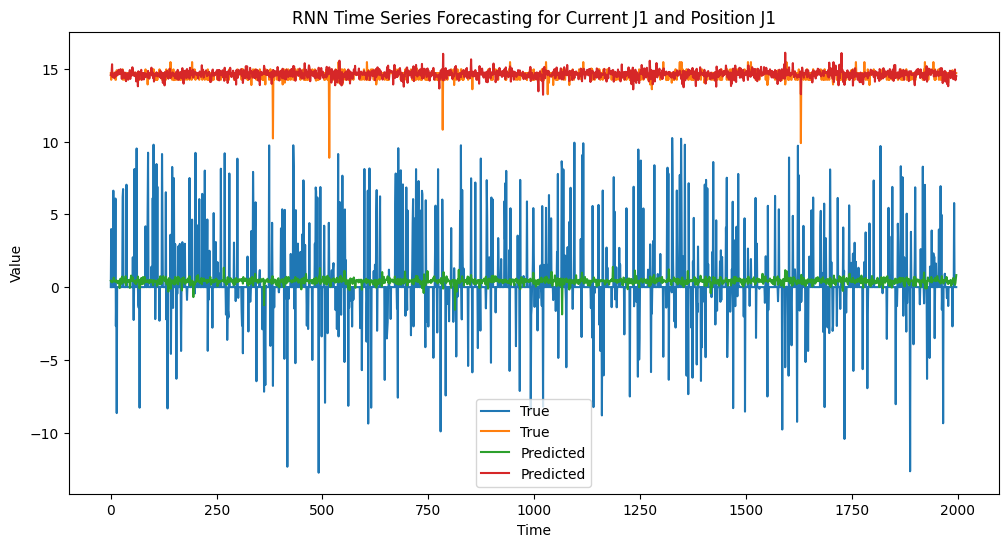

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the columns you want to use for prediction (e.g., Current J1 and Position J1)
features = ['Current J1', 'Position J1']

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

# Define the number of time steps (look-back) for the RNN
look_back = 10  # You can adjust this based on your data

# Create sequences of data with the specified look-back
X, y = [], []
for i in range(len(df) - look_back):
    X.append(df[features].iloc[i:i+look_back].values)
    y.append(df[features].iloc[i+look_back].values)

X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build an RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(look_back, len(features))))
model.add(Dense(units=len(features)))  # Output layer with the same number of features

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('RNN Time Series Forecasting for Current J1 and Position J1')
plt.show()


Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.0435
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0094
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0093
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0094
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 11/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0091
Epoch 12/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092
Epoch 13/50
250/250 [====

63/63 [==============================] - 0s 2ms/step - loss: 0.0091
Test Loss (Current): 0.0091
63/63 [==============================] - 0s 1ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Current Value')

Text(0.5, 1.0, 'RNN Time Series Forecasting for Current Values')

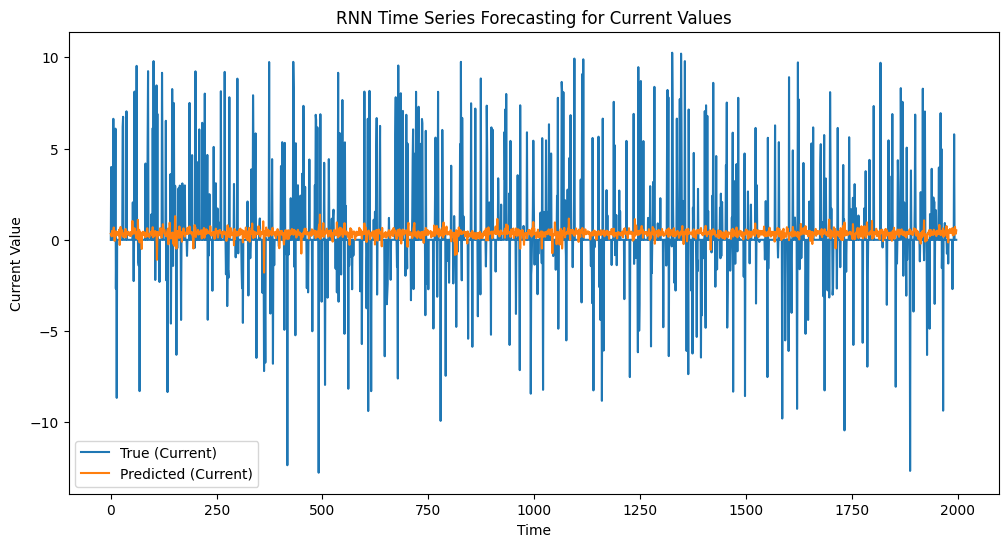

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Position Value')

Text(0.5, 1.0, 'Position Values Over Time')

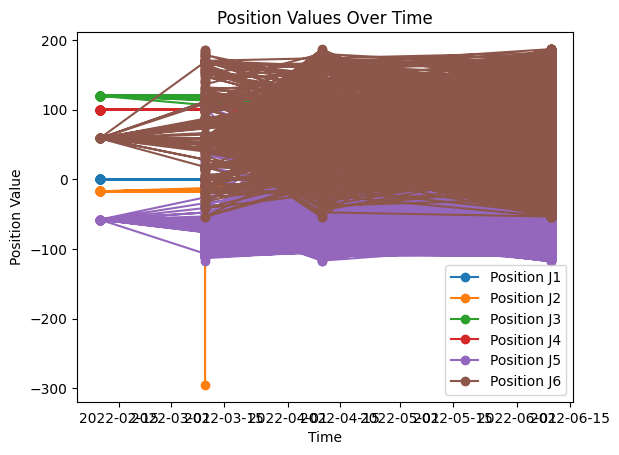

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the columns you want to use for prediction (e.g., Current J1 and Position J1)
current_features = ['Current J1']
position_features = ['Position J1']

# Normalize the data using Min-Max scaling separately for current and position features
scaler_current = MinMaxScaler()
scaler_position = MinMaxScaler()
df[current_features] = scaler_current.fit_transform(df[current_features])
df[position_features] = scaler_position.fit_transform(df[position_features])

# Define the number of time steps (look-back) for the RNN
look_back = 10  # You can adjust this based on your data

# Create sequences of data with the specified look-back
X_current, X_position, y = [], [], []
for i in range(len(df) - look_back):
    X_current.append(df[current_features].iloc[i:i+look_back].values)
    X_position.append(df[position_features].iloc[i:i+look_back].values)
    y.append(df[current_features].iloc[i+look_back].values)

X_current = np.array(X_current)
X_position = np.array(X_position)
y = np.array(y)

# Split the data into training and testing sets
X_current_train, X_current_test, X_position_train, X_position_test, y_train, y_test = train_test_split(
    X_current, X_position, y, test_size=0.2, random_state=42)

# Build an RNN model for current values
model_current = Sequential()
model_current.add(SimpleRNN(units=50, activation='relu', input_shape=(look_back, len(current_features))))
model_current.add(Dense(units=len(current_features)))  # Output layer with the same number of current features

# Compile the current model
model_current.compile(optimizer='adam', loss='mean_squared_error')

# Train the current model
model_current.fit(X_current_train, y_train, epochs=50, batch_size=32)

# Evaluate the current model
loss_current = model_current.evaluate(X_current_test, y_test)
print(f'Test Loss (Current): {loss_current:.4f}')

# Make predictions for current
predictions_current = model_current.predict(X_current_test)

# Inverse transform the scaled current predictions to the original scale
predictions_current = scaler_current.inverse_transform(predictions_current)
y_test_current = scaler_current.inverse_transform(y_test)

# Plot the results for current values
plt.figure(figsize=(12, 6))
plt.plot(y_test_current, label='True (Current)')
plt.plot(predictions_current, label='Predicted (Current)')
plt.xlabel('Time')
plt.ylabel('Current Value')
plt.legend()
plt.title('RNN Time Series Forecasting for Current Values')
plt.show()

# Plot position columns
for j in range(1, 7):
    position_column = f'Position J{j}'
    plt.plot(df.index, df[position_column], label=f'Position J{j}', marker='o')

plt.xlabel('Time')
plt.ylabel('Position Value')
plt.legend()
plt.title('Position Values Over Time')
plt.show()


In [ ]:
pip install PyWavelets


In [ ]:
df.tail()

Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10    0.506874     0.049878        0.00       -17.26       11.11   
2022-06-10    0.904124     0.052455        0.32       -12.28       10.66   
2022-06-10    0.589363     0.049946        0.04       -13.01       11.03   
2022-06-10    0.718524     0.048318        0.12       -15.06       11.78   
2022-03-10    0.506874     0.049878        0.00       -17.26       11.11   

            Position J3  Current J4  Position J4  Current J5  Position J5  \
Date                                                                        
2022-03-10       119.67      -23.44          100        0.00       -57.87   
2022-06-10       104.97      -33.56          100      299.00       106.60   
2022-06-10       108.91     -161.64          100       45.28       -63.12   
2022-06-10       117.87     -141.36          100      236.44       -76.68   
2022-03-10       119.67      -23.44          100        0.00       -57.87   

            Current J6  Position J6                          Cycle Number  \
Date                                                                        
2022-03-10        0.00        58.78  WSBYMBROW000061_11_20221002_04:47:05   
2022-06-10       12.00        85.62  WSBYMBROW000061_11_20221006_16:37:58   
2022-06-10       15.42       170.43  WSBYMBROW000061_11_20221006_17:18:36   
2022-06-10      -25.83        15.69  WSBYMBROW000061_11_20221006_23:11:22   
2022-03-10        0.00        58.78  WSBYMBROW000061_11_20221002_04:47:05   

           TimeStamp  
Date                  
2022-03-10  01:03:24  
2022-06-10  16:38:23  
2022-06-10  17:18:48  
2022-06-10  23:11:57  
2022-03-10  14:05:31

#WAVELET TRANSFORMATIONS

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Current J1')

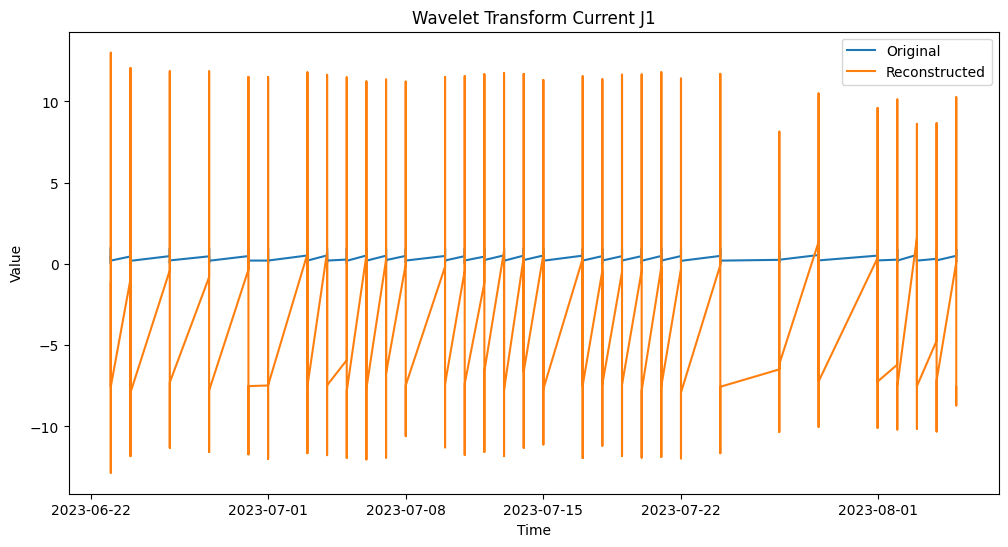

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler


# Randomly select 10,000 rows from the DataFrame
#df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Current J1'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Current J1')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Sample Number')

Text(0, 0.5, 'Current J1')

Text(0.5, 1.0, 'Performance Patterns of Welding Robots')

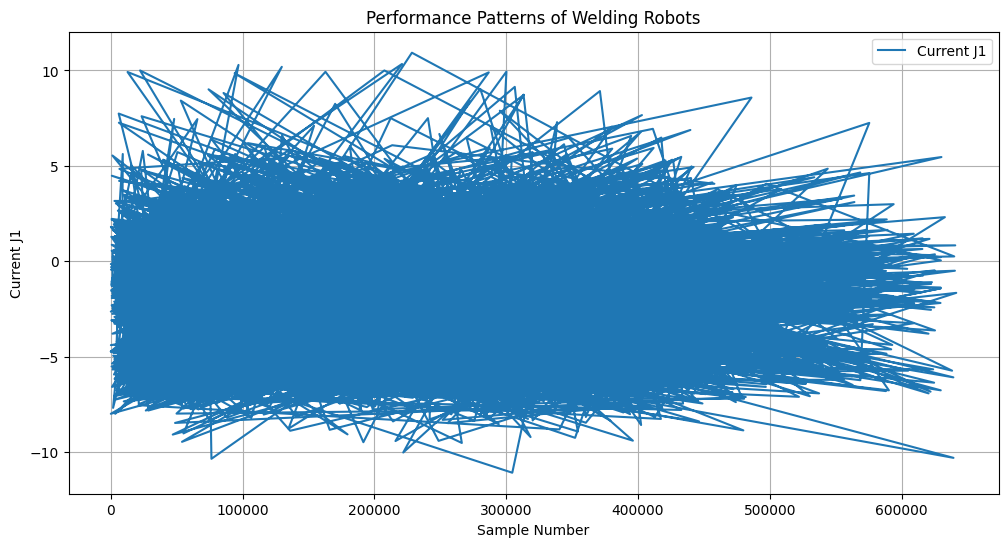

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Visualize performance patterns (e.g., Current J1)
plt.figure(figsize=(12, 6))
plt.plot(df['SNo'], df['Current J1'], label='Current J1')
plt.xlabel('Sample Number')
plt.ylabel('Current J1')
plt.legend()
plt.title('Performance Patterns of Welding Robots')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming you have an auto-encoder model 'autoencoder' and original data 'X_original'
X_original = np.array([[-1.18], [-1.88], [-1.88], [-4.78], [-9.12]])  # Example data
X_reconstructed = autoencoder.predict(X_original)

# Calculate Mean Squared Error (MSE) between original and reconstructed data
mse = mean_squared_error(X_original, X_reconstructed)
print("Auto-Encoder Mean Squared Error (MSE):", mse)


1/1 [==============================] - 0s 96ms/step
Auto-Encoder Mean Squared Error (MSE): 24.47156483806568


In [ ]:
pip install keras


In [ ]:
import pandas as pd
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model

columns_with_missing_values = ['Program Line Number', 'Robot Fault Output', 'Alarm', 'Battery Low Level Output', 'Quality']

# Now, let's remove those columns from the DataFrame
df_cleaned = df.drop(columns=columns_with_missing_values)
df = df_cleaned


# Define the autoencoder architecture for feature learning
input_layer = Input(shape=(1,))
encoded = Dense(32, activation='relu')(input_layer)  # Adjust the number of nodes as needed
decoded = Dense(1, activation='linear')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder to learn features
autoencoder.fit(df['Current J1'], df['Current J1'], epochs=100, batch_size=32, shuffle=True, verbose=1)

# Extract learned features (encoded representations)
encoded_features = autoencoder.predict(df['Current J1'])

# Display the learned features (encoded representations)
print("Learned Features (Encoded Representations):")
print(encoded_features)


Epoch 1/100
313/313 [==============================] - 2s 4ms/step - loss: 1.6468
Epoch 2/100
313/313 [==============================] - 2s 6ms/step - loss: 0.0487
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0125
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.0018
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 1.9177e-04
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 6.9547e-05
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 5.6567e-05
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 4.8853e-05
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 4.2249e-05
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 3.6636e-05
Epoch 11/100
313/313 [==============================] - 1s 2ms/step - loss: 3.2115e-05
Epoch 12/100
313/313 [==============================] - 0s 2ms/step 

313/313 [==============================] - 0s 1ms/step
Learned Features (Encoded Representations):
[[ 1.9801209 ]
 [-3.0475824 ]
 [-2.4780014 ]
 ...
 [-0.90915495]
 [-2.3480968 ]
 [ 2.150135  ]]


Epoch 1/20
123729/123729 [==============================] - 243s 2ms/step - loss: 0.0046
Epoch 2/20
123729/123729 [==============================] - 229s 2ms/step - loss: 9.5580e-07
Epoch 3/20
123729/123729 [==============================] - 221s 2ms/step - loss: 7.4729e-07
Epoch 4/20
123729/123729 [==============================] - 280s 2ms/step - loss: 7.0792e-07
Epoch 5/20
123729/123729 [==============================] - 225s 2ms/step - loss: 7.4568e-07
Epoch 6/20
123729/123729 [==============================] - 220s 2ms/step - loss: 7.2617e-07
Epoch 7/20
123729/123729 [==============================] - 220s 2ms/step - loss: 6.7832e-07
Epoch 8/20
123729/123729 [==============================] - 219s 2ms/step - loss: 7.1127e-07
Epoch 9/20
123729/123729 [==============================] - 220s 2ms/step - loss: 7.3524e-07
Epoch 10/20
123729/123729 [==============================] - 221s 2ms/step - loss: 7.0400e-07
Epoch 11/20
123729/123729 [==============================] - 219s 2ms/ste

123729/123729 [==============================] - 173s 1ms/step


<Figure size 1200x600 with 0 Axes>

ValueError: ignored

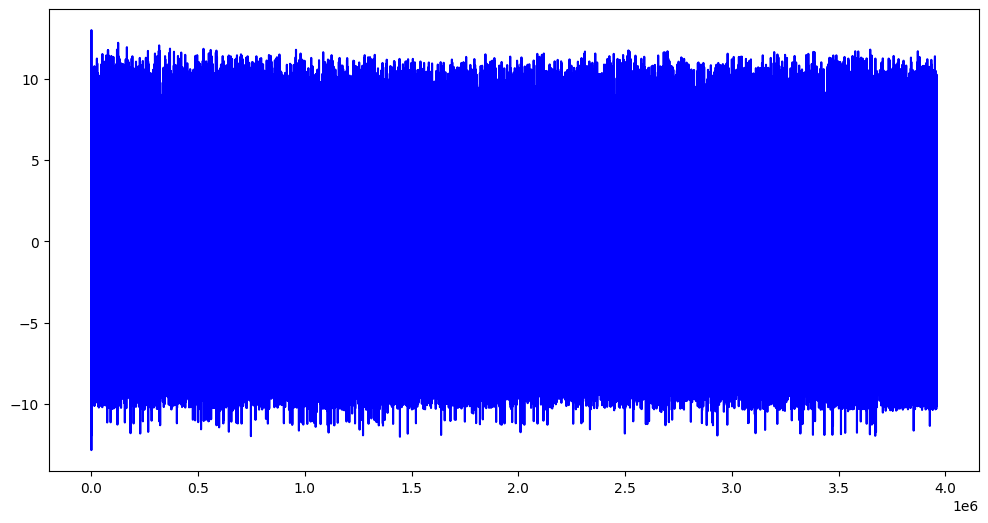

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

# Load your dataset (replace 'path' with your actual data file)
df = pd.read_csv(path)

# Columns with missing values
columns_with_missing_values = ['Program Line Number', 'Robot Fault Output', 'Alarm', 'Battery Low Level Output', 'Quality']

# Remove columns with missing values
df_cleaned = df.drop(columns=columns_with_missing_values)

# Split the data into features
X = df_cleaned[['Current J1']]

# Define the autoencoder architecture for anomaly detection
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes as needed
decoded = Dense(1, activation='linear')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder to learn features
autoencoder.fit(X, X, epochs=20, batch_size=32, shuffle=True, verbose=1)

# Use the trained autoencoder to encode the data
encoded_data = autoencoder.predict(X)

# Calculate reconstruction errors
reconstruction_errors = np.mean(np.square(X - encoded_data), axis=1)

# Define a threshold for anomaly detection (e.g., using a percentile)
threshold = np.percentile(reconstruction_errors, 95)

# Identify anomalies based on the threshold
anomalies = df_cleaned[reconstruction_errors > threshold]

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, X, label='Original Data', color='blue')
plt.scatter(anomalies.index, anomalies, color='red', marker='o', label='Anomalies')
plt.xlabel('Sample Number')
plt.ylabel('Current J1')
plt.legend()
plt.title('Anomaly Detection with Autoencoder (Current J1)')
plt.grid(True)
plt.show()

# Display detected anomalies
print("Detected Anomalies:")
print(anomalies)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model

# Load your dataset (replace 'path' with your actual data file)
df = pd.read_csv(path)

# Columns with missing values
columns_with_missing_values = ['Program Line Number', 'Robot Fault Output', 'Alarm', 'Battery Low Level Output', 'Quality']

# Remove columns with missing values
df_cleaned = df.drop(columns=columns_with_missing_values)

# Split the data into features
X = df_cleaned[['Position J1']]

# Define the autoencoder architecture for anomaly detection
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes as needed
decoded = Dense(1, activation='linear')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder to learn features
autoencoder.fit(X, X, epochs=20, batch_size=32, shuffle=True, verbose=1)

# Use the trained autoencoder to encode the data
encoded_data = autoencoder.predict(X)

# Calculate reconstruction errors
reconstruction_errors = np.mean(np.square(X - encoded_data), axis=1)

# Define a threshold for anomaly detection (e.g., using a percentile)
threshold = np.percentile(reconstruction_errors, 95)

# Identify anomalies based on the threshold
anomalies = df_cleaned[reconstruction_errors > threshold]

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, X, label='Original Data', color='blue')
plt.scatter(anomalies.index, anomalies, color='red', marker='o', label='Anomalies')
plt.xlabel('Sample Number')
plt.ylabel('Current J1')
plt.legend()
plt.title('Anomaly Detection with Autoencoder (Current J1)')
plt.grid(True)
plt.show()

# Display detected anomalies
print("Detected Anomalies:")
print(anomalies)


Epoch 1/100
313/313 [==============================] - 3s 5ms/step - loss: 0.6174
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.0452
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 0.0401
Epoch 4/100
313/313 [==============================] - 2s 5ms/step - loss: 0.0401
Epoch 5/100
313/313 [==============================] - 2s 6ms/step - loss: 0.0401
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 0.0401
Epoch 7/100
313/313 [==============================] - 2s 5ms/step - loss: 0.0401
Epoch 8/100
313/313 [==============================] - 2s 5ms/step - loss: 0.0403
Epoch 9/100
313/313 [==============================] - 2s 5ms/step - loss: 0.0403
Epoch 10/100
313/313 [==============================] - 2s 7ms/step - loss: 0.0402
Epoch 11/100
313/313 [==============================] - 3s 11ms/step - loss: 0.0402
Epoch 12/100
313/313 [==============================] - 2s 5ms/step - loss: 0.0403
Epoch 13/100

313/313 [==============================] - 0s 1ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Sample Number')

Text(0, 0.5, 'Current J1')

Text(0.5, 1.0, 'Denoising with Autoencoder')

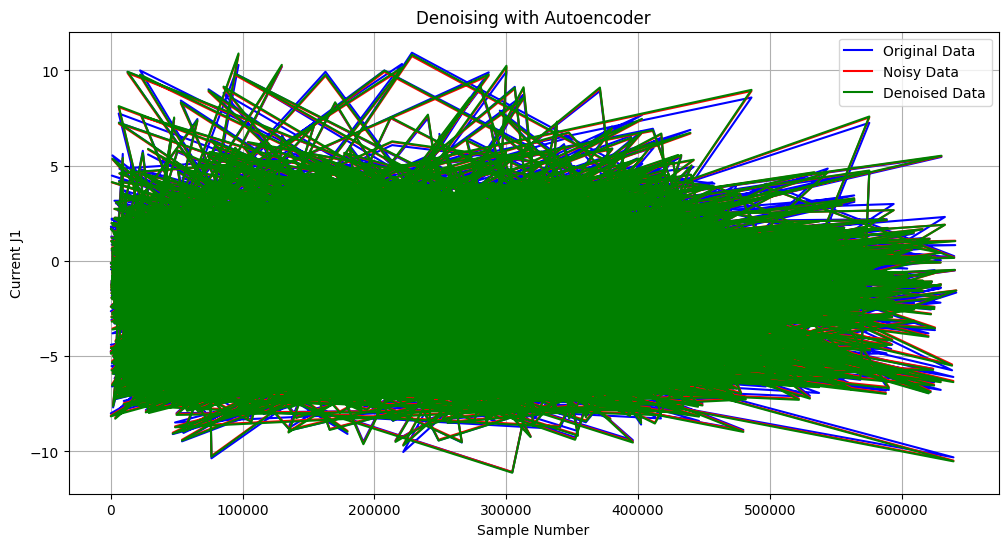

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model



# Add noise to the data (you can adjust the noise level)
noise_factor = 0.2
noisy_data = df['Current J1'] + noise_factor * np.random.normal(size=len(df['Current J1']))

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(64, activation='relu')(input_layer)
decoded = Dense(1, activation='linear')(encoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on noisy data
autoencoder.fit(noisy_data, df['Current J1'], epochs=100, batch_size=32, shuffle=True, verbose=1)

# Use the trained autoencoder to denoise data
denoised_data = autoencoder.predict(noisy_data)

# Visualize original, noisy, and denoised data
plt.figure(figsize=(12, 6))
plt.plot(df['SNo'], df['Current J1'], label='Original Data', color='blue')
plt.plot(df['SNo'], noisy_data, label='Noisy Data', color='red')
plt.plot(df['SNo'], denoised_data, label='Denoised Data', color='green')
plt.xlabel('Sample Number')
plt.ylabel('Current J1')
plt.legend()
plt.title('Denoising with Autoencoder')
plt.grid(True)
plt.show()


In [ ]:
# 2.1 Load the data
df = pd.read_csv(path)

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Position J1')

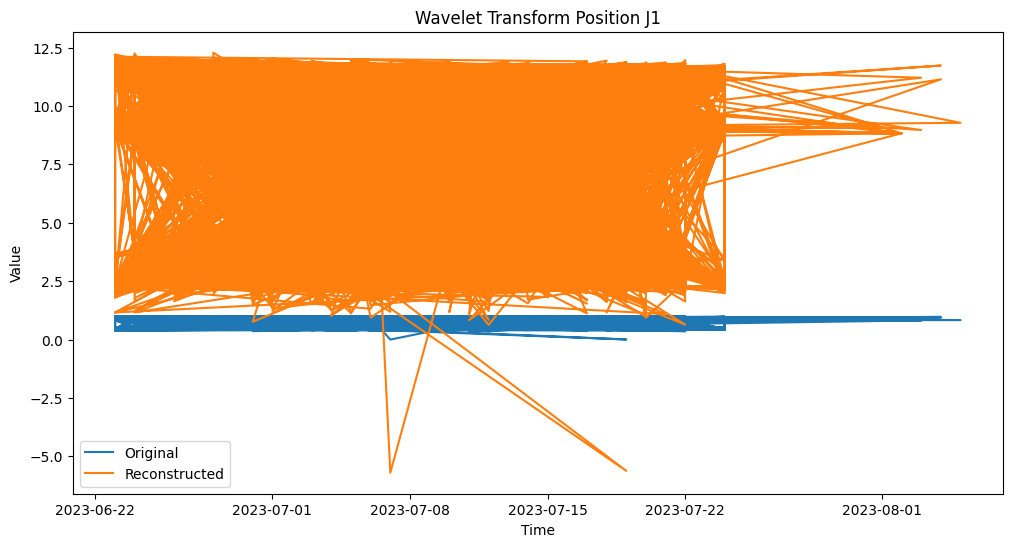

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler


# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Position J1'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Position J1')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Current J2')

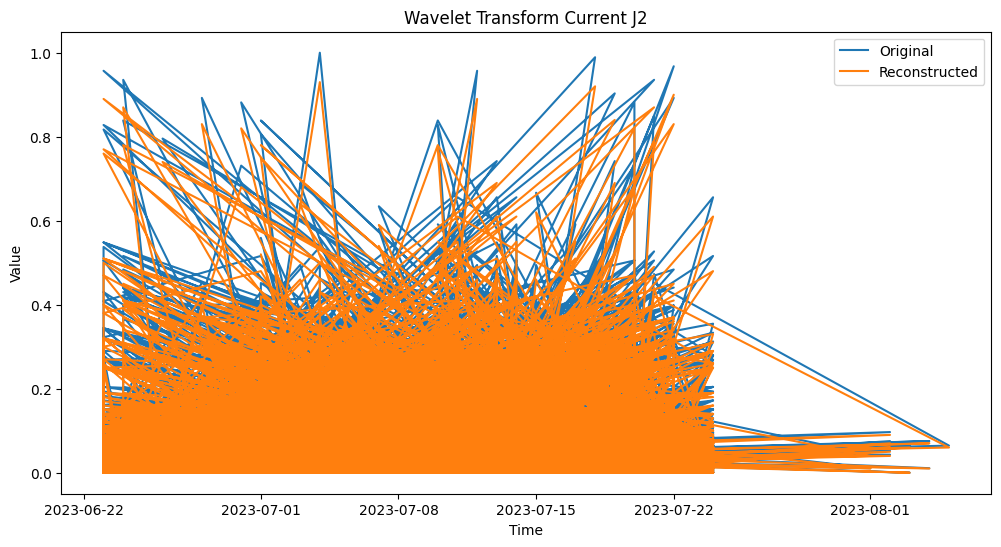

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Current J2'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Current J2')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Position J2')

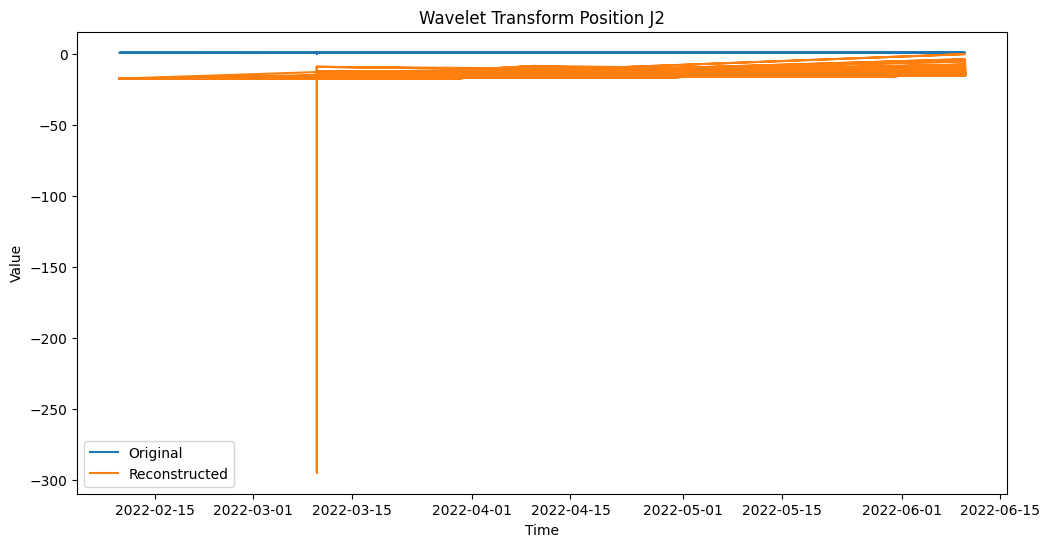

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Position J2'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Position J2')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Current J3')

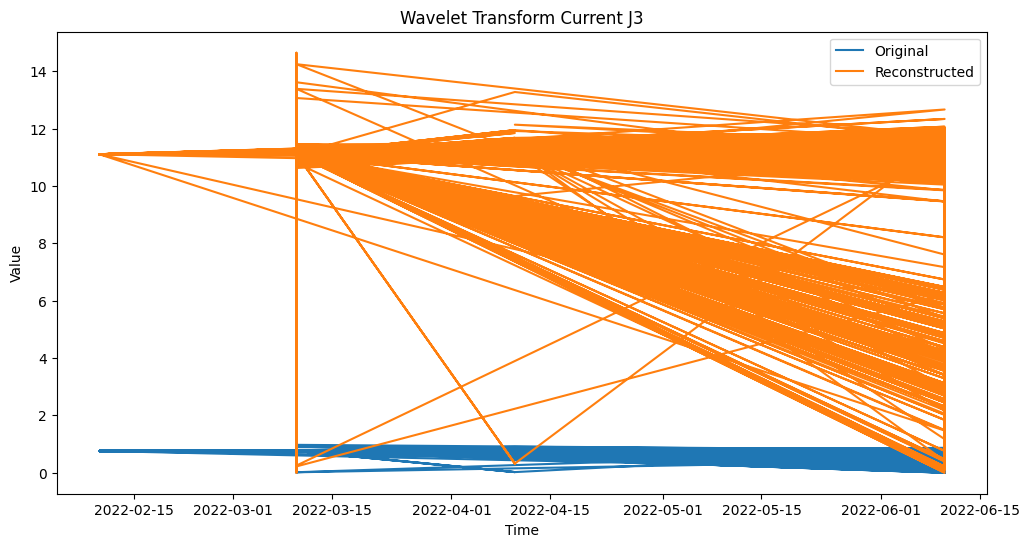

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Current J3'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Current J3')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Position J3')

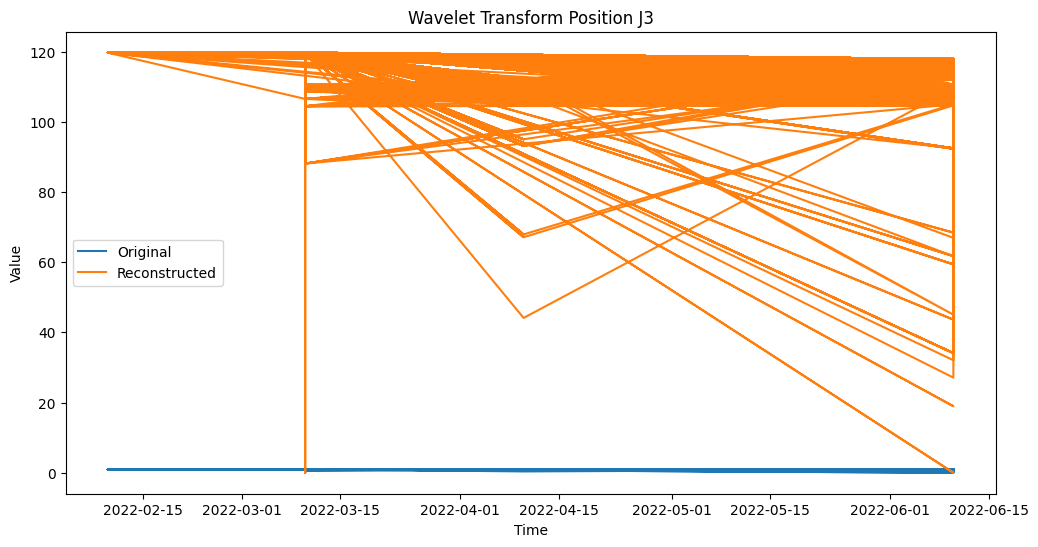

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Position J3'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Position J3')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Current J4')

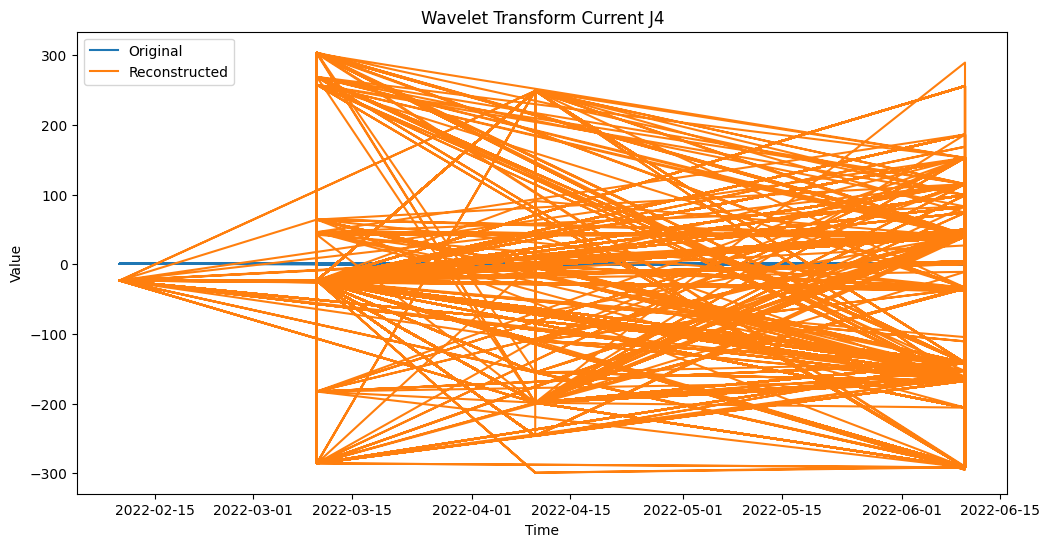

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Current J4'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Current J4')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Position J4')

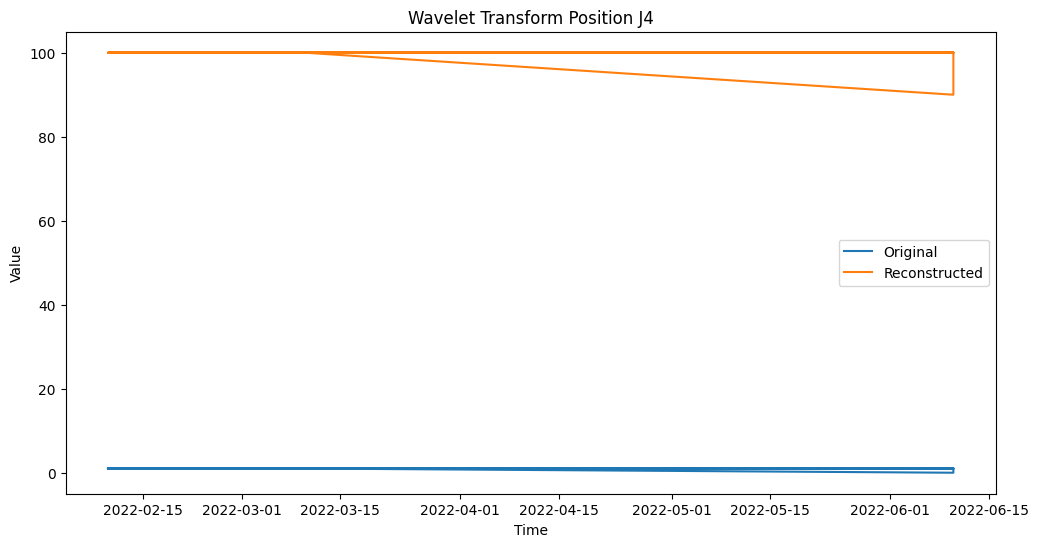

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Position J4'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Position J4')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Current J5')

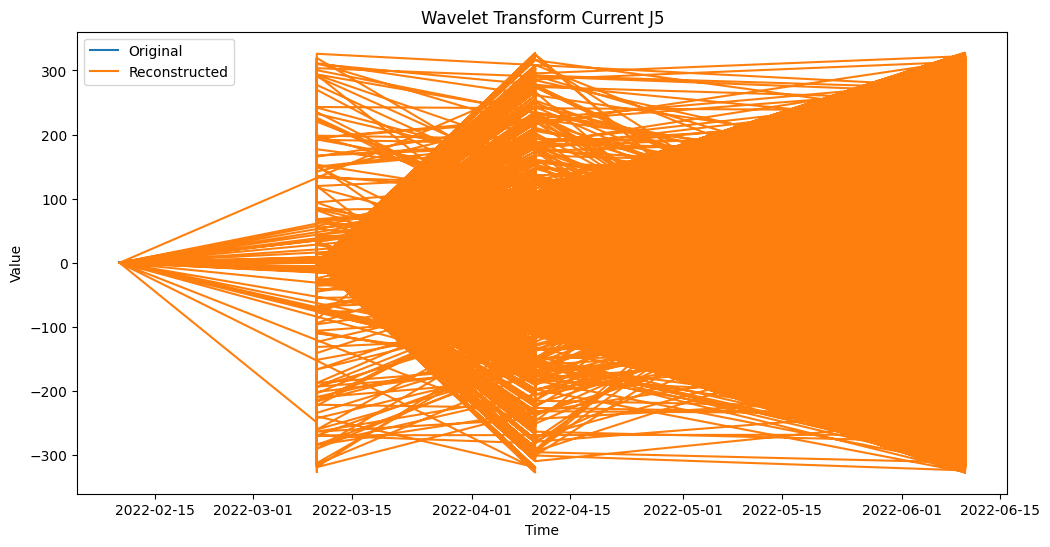

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Current J5'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Current J5')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Position J5')

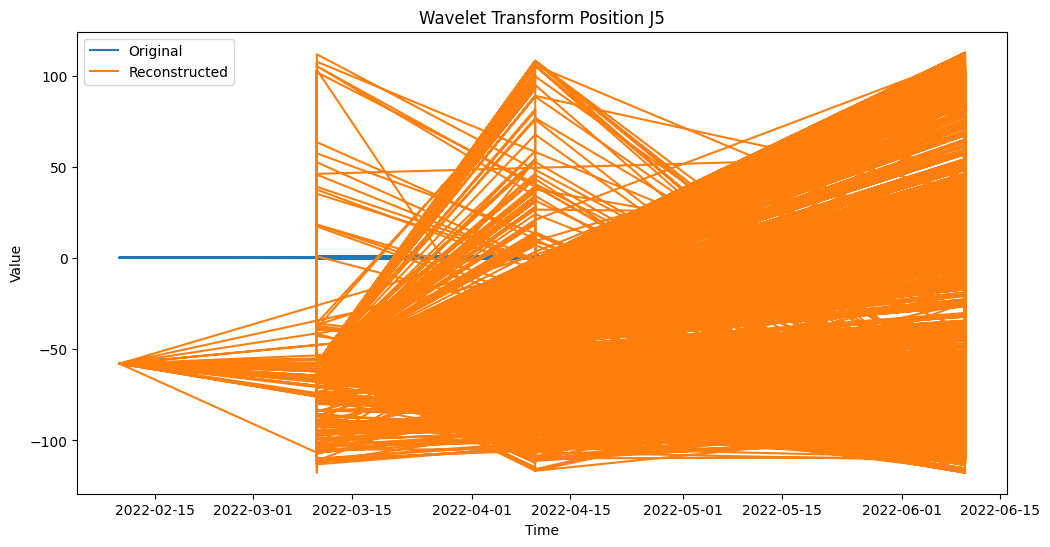

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Position J5'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Position J5')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Current J6')

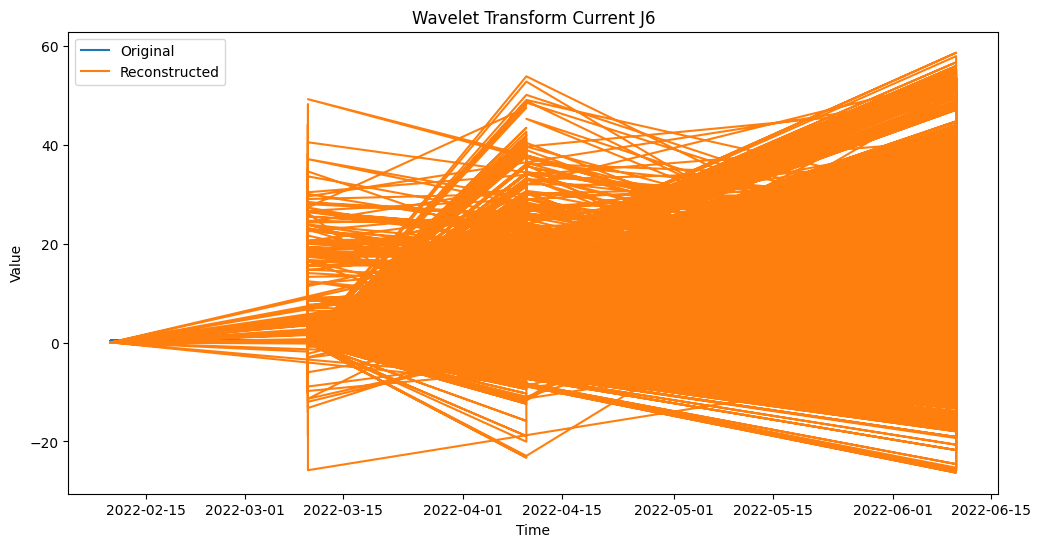

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Current J6'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Current J6')
plt.show()


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Wavelet Transform Position J6')

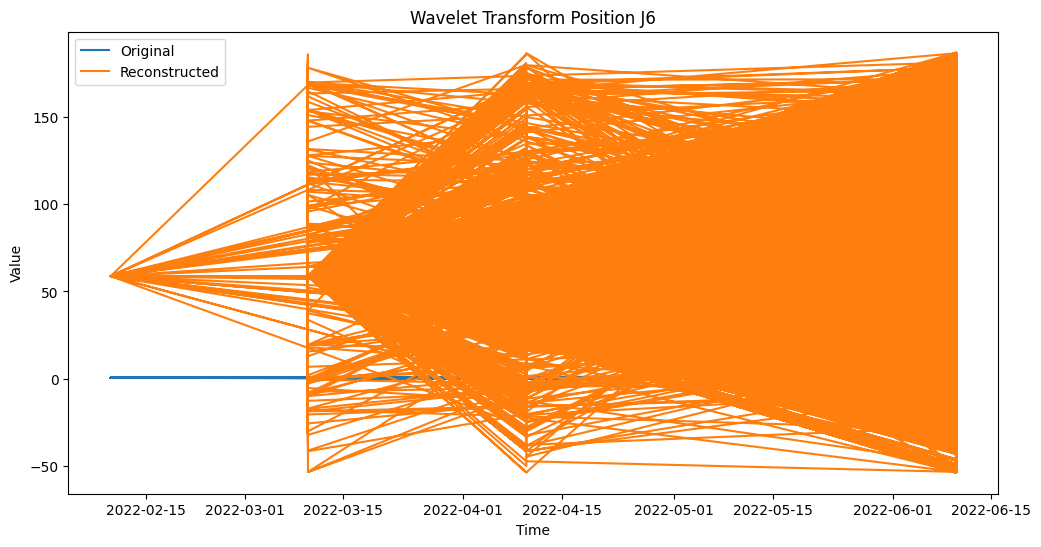

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from sklearn.preprocessing import MinMaxScaler

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to apply the wavelet transform to (e.g., 'Current J1')
feature = 'Position J6'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Apply the wavelet transform (e.g., using the Daubechies 4 wavelet)
wavelet = 'db4'
coeffs = pywt.wavedec(df[feature], wavelet)

# Reconstruct the signal from the wavelet coefficients (you can use different levels)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Inverse transform the scaled data to the original scale
reconstructed_signal = scaler.inverse_transform(reconstructed_signal.reshape(-1, 1))

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.plot(df.index, reconstructed_signal, label='Reconstructed')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Wavelet Transform Position J6')
plt.show()


#ANOMALIES DETECTION USING AUTOENCODERS

Epoch 1/64
250/250 [==============================] - 2s 4ms/step - loss: 0.0147 - val_loss: 0.0124
Epoch 2/64
250/250 [==============================] - 1s 2ms/step - loss: 0.0099 - val_loss: 0.0074
Epoch 3/64
250/250 [==============================] - 0s 2ms/step - loss: 0.0051 - val_loss: 0.0031
Epoch 4/64
250/250 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 9.4958e-04
Epoch 5/64
250/250 [==============================] - 1s 2ms/step - loss: 5.0383e-04 - val_loss: 2.7371e-04
Epoch 6/64
250/250 [==============================] - 0s 2ms/step - loss: 1.5536e-04 - val_loss: 1.3013e-04
Epoch 7/64
250/250 [==============================] - 1s 2ms/step - loss: 9.1347e-05 - val_loss: 1.0257e-04
Epoch 8/64
250/250 [==============================] - 0s 2ms/step - loss: 7.8497e-05 - val_loss: 9.2128e-05
Epoch 9/64
250/250 [==============================] - 0s 2ms/step - loss: 7.2836e-05 - val_loss: 8.6285e-05
Epoch 10/64
250/250 [==============================] - 1

63/63 [==============================] - 0s 1ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Current J1')

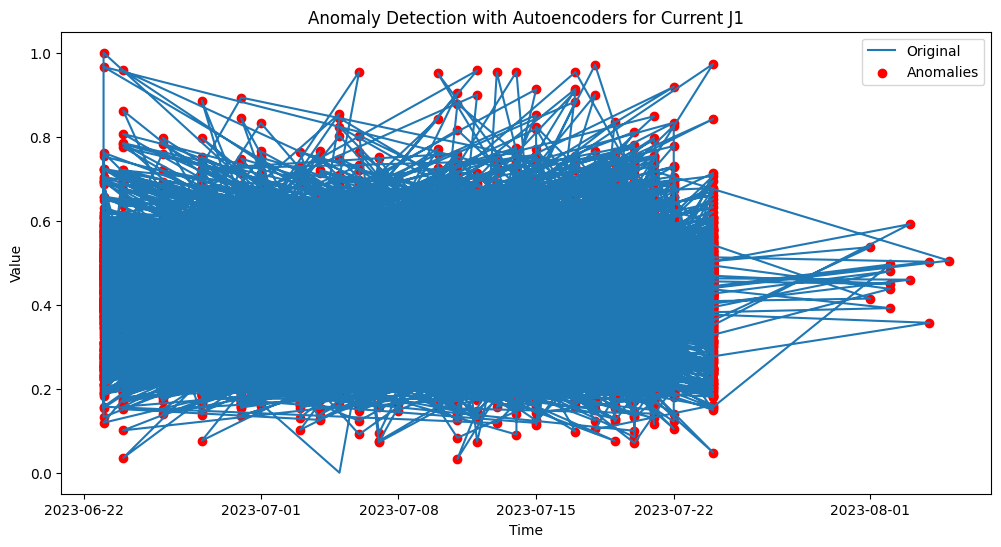

               SNo  Current J1  Position J1  Current J2  Position J2  \
Date                                                                   
2023-07-03  147428    0.593551        11.45        0.04       -11.94   
2023-07-05  324834    0.365123         8.70        0.03       -11.99   
2023-07-22  386464    0.391008         9.43        0.00       -12.12   
2023-07-13  424451    0.397366        10.89        0.02       -12.08   
2023-06-30   65343    0.453224         3.51        0.01       -11.78   
...            ...         ...          ...         ...          ...   
2023-07-19  363609    0.493642         9.34        0.05       -11.90   
2023-07-05  422809    0.491826         9.22        0.22       -12.00   
2023-07-03  181760    0.462307         8.84        0.05       -12.10   
2023-07-21  290764    0.396912        11.25        0.02       -11.94   
2023-07-11    4586    0.601272         2.45        0.08       -11.96   

            Current J3  Position J3  Current J4  Position J4  C

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Current J1'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=64, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 99)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Current J1')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.0750 - val_loss: 0.0251
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0191 - val_loss: 0.0172
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0169 - val_loss: 0.0164
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0161 - val_loss: 0.0155
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0150 - val_loss: 0.0143
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0136 - val_loss: 0.0127
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.0107
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0096 - val_loss: 0.0083
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0071 - val_loss: 0.0058
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0047 - val_loss: 0.0036

63/63 [==============================] - 0s 1ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Position J1')

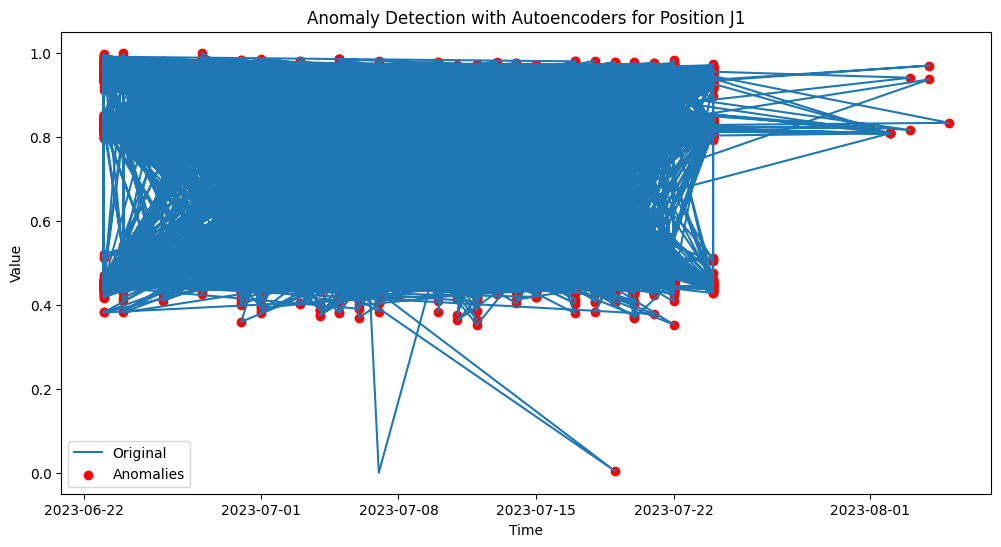

               SNo  Current J1  Position J1  Current J2  Position J2  \
Date                                                                   
2023-07-03  147428        1.98     0.953838        0.04       -11.94   
2023-07-05  324834       -3.05     0.800890        0.03       -11.99   
2023-07-22  386464       -2.48     0.841491        0.00       -12.12   
2023-07-13  424451       -2.34     0.922692        0.02       -12.08   
2023-06-30   65343       -1.11     0.512236        0.01       -11.78   
...            ...         ...          ...         ...          ...   
2023-07-19  363609       -0.22     0.836485        0.05       -11.90   
2023-07-05  422809       -0.26     0.829811        0.22       -12.00   
2023-07-03  181760       -0.91     0.808676        0.05       -12.10   
2023-07-21  290764       -2.35     0.942714        0.02       -11.94   
2023-07-11    4586        2.15     0.453281        0.08       -11.96   

            Current J3  Position J3  Current J4  Position J4  C

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Position J1'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Position J1')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.1472 - val_loss: 0.0744
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0420 - val_loss: 0.0231
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0165 - val_loss: 0.0126
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 0.0078
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 0.0045
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 0.0027
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0014

63/63 [==============================] - 0s 2ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Current J2')

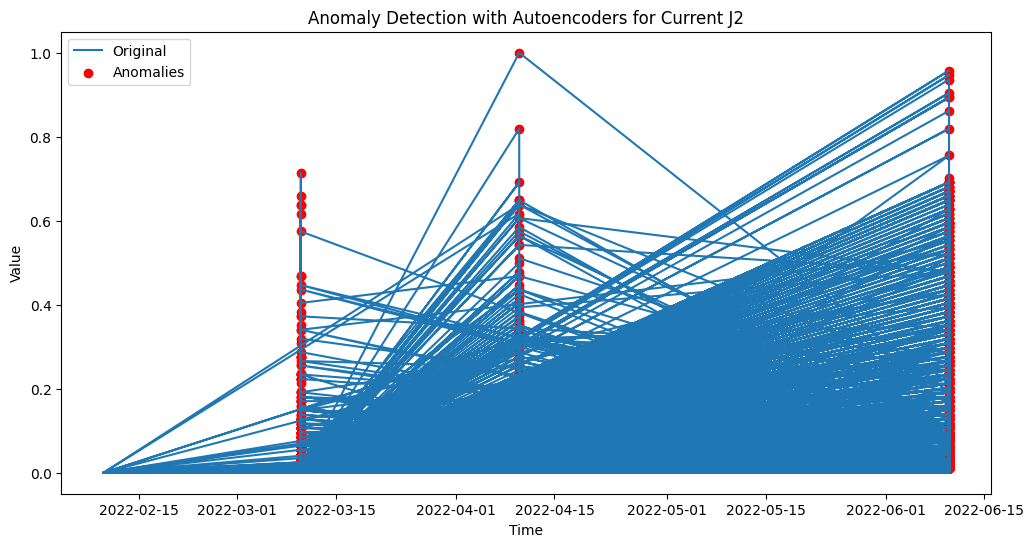

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-06-10       -2.32        14.05    0.138298       -13.82       11.26   
2022-06-10        0.20         9.90    0.085106       -12.95       12.67   
2022-04-10       -5.01        14.97    0.042553       -12.86       11.19   
2022-06-10        8.65        14.73    0.053191       -13.30       11.62   
2022-06-10        0.92        14.25    0.063830       -13.94       11.54   
...                ...          ...         ...          ...         ...   
2022-06-10        0.12        14.25    0.393617       -14.75       11.78   
2022-04-10        6.26        14.97    0.095745       -12.86       11.29   
2022-03-10        9.79        14.98    0.372340       -12.67       10.70   
2022-06-10       -3.54        14.25    0.287234       -14.75       11.31   
2022-06-10        1.66        14.25    0.010638       -15.06       11.69   

           

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Current J2'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Current J2')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0869 - val_loss: 0.0466
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0266 - val_loss: 0.0135
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0081 - val_loss: 0.0045
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0029 - val_loss: 0.0017
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 7.2161e-04
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 5.4516e-04 - val_loss: 3.2352e-04
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 2.8676e-04 - val_loss: 1.5519e-04
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 1.7835e-04 - val_loss: 8.3189e-05
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 1.3310e-04 - val_loss: 5.2556e-05
Epoch 10/50
250/250 [==============================] - 0s 2ms/st

63/63 [==============================] - 0s 794us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Position J2')

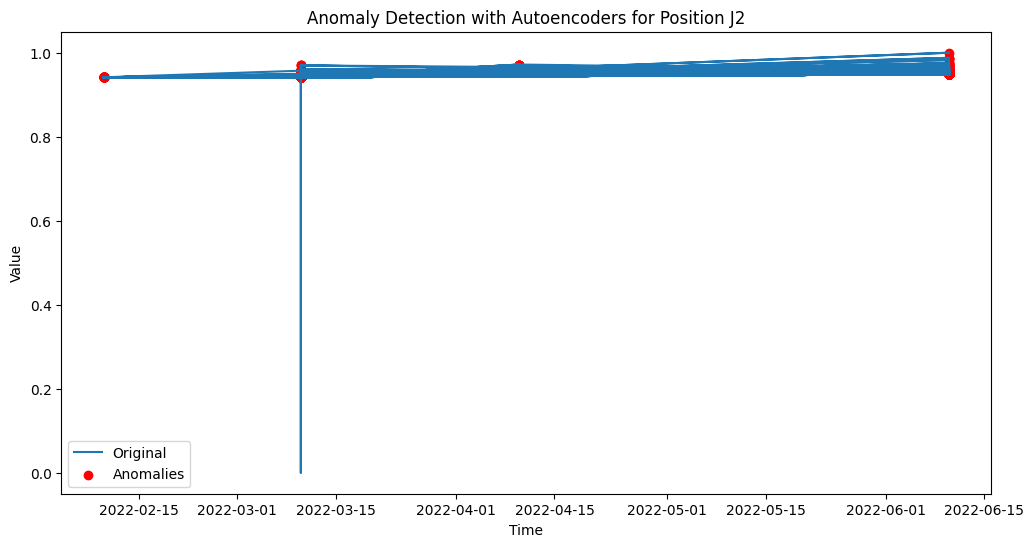

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-06-10       -2.32        14.05        0.13     0.953140       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01     0.948935       11.69   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   
2022-03-10        0.00        14.71        0.00     0.941476       11.11   

           

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Position J2'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Position J2')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0052 - val_loss: 0.0025
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0011

63/63 [==============================] - 0s 799us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Current J3')

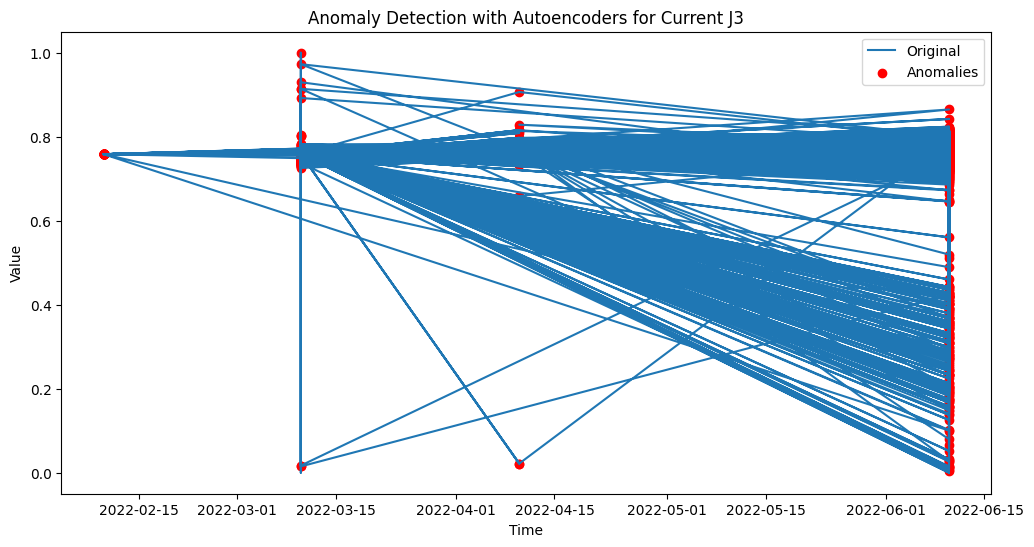

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-06-10       -2.32        14.05        0.13       -13.82    0.768601   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06    0.797952   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   
2022-03-10        0.00        14.71        0.00       -17.26    0.758362   

           

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Current J3'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Current J3')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 2s 4ms/step - loss: 0.1388 - val_loss: 0.0451
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0252 - val_loss: 0.0134
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0092 - val_loss: 0.0062
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0048 - val_loss: 0.0039
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0019 - val_loss: 0.0023
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0022

63/63 [==============================] - 0s 1ms/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Position J3')

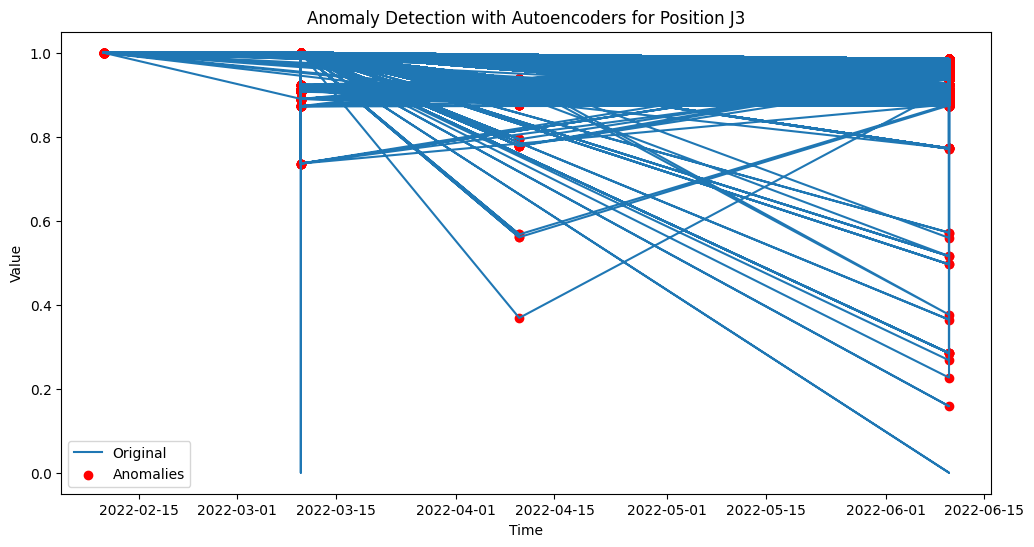

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Position J3'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Position J3')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.0186 - val_loss: 0.0179
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0134 - val_loss: 0.0123
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0086 - val_loss: 0.0074
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 9.8874e-04 - val_loss: 9.3852e-04
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 7.3264e-04 - val_loss: 7.2418e-04
Epoch 9/50
250/250 [==============================] - 1s 2ms/step - loss: 5.7741e-04 - val_loss: 5.8531e-04
Epoch 10/50
250/250 [==============================] - 1s 3ms/step - loss: 4

63/63 [==============================] - 0s 804us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Current J4')

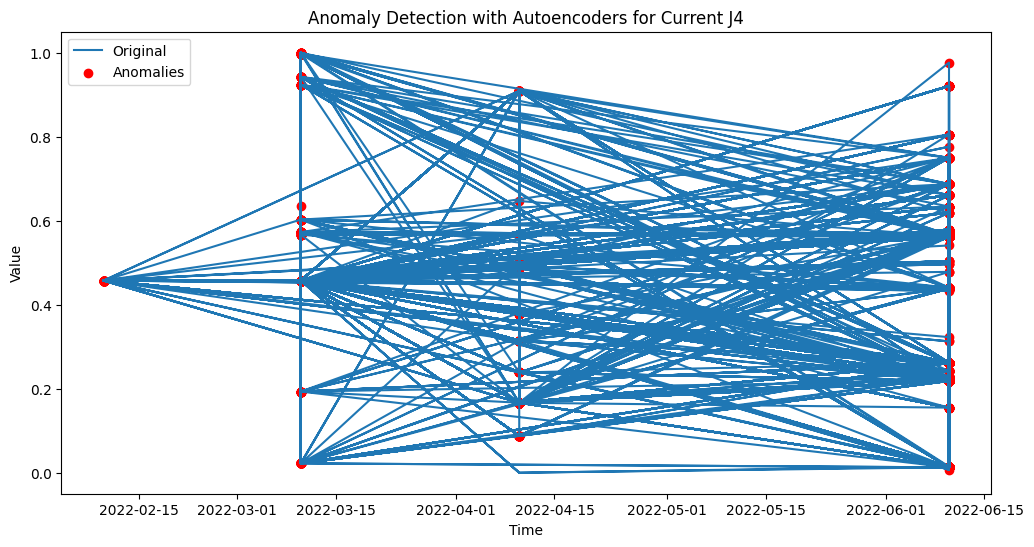

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Current J4'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Current J4')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0558 - val_loss: 0.0181
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0055
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 6.6075e-04 - val_loss: 8.5810e-04
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 4.5765e-04 - val_loss: 7.1195e-04
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 3.3199e-04 - val_loss: 6.2020e-04
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 2.4913e-04 - val_loss: 5.5969e-04
Epoch 10/50
250/250 [==============================] - 0s 2ms/step -

63/63 [==============================] - 0s 892us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Position J4')

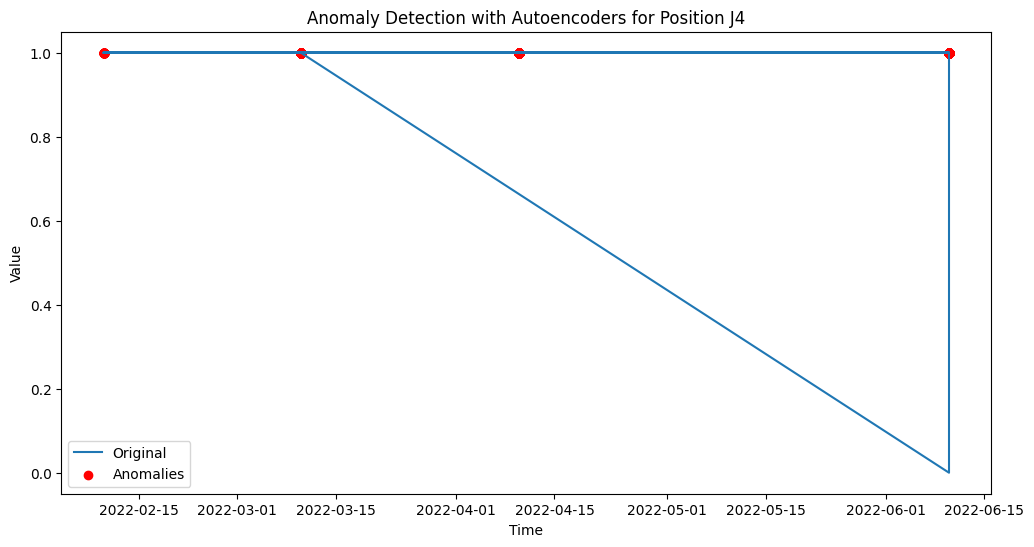

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Position J4'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Position J4')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0190 - val_loss: 0.0168
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0136 - val_loss: 0.0123
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0096 - val_loss: 0.0081
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0048
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 9.3511e-04
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 7.8514e-04 - val_loss: 6.5554e-04
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 5.7870e-04 - val_loss: 5.1499e-04
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 4.625

63/63 [==============================] - 0s 895us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Current J5')

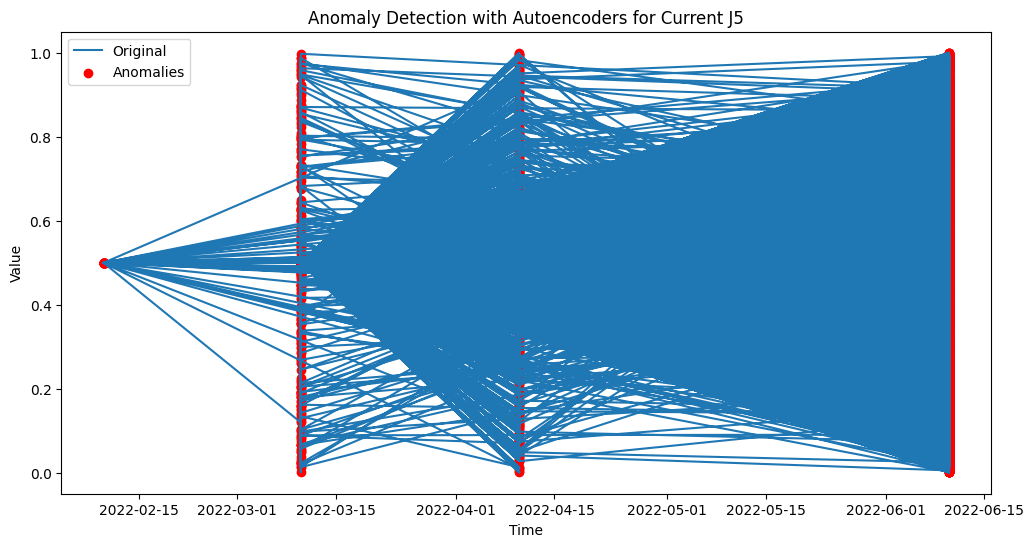

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Current J5'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Current J5')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0369 - val_loss: 0.0289
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0208 - val_loss: 0.0222
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0146 - val_loss: 0.0141
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0085 - val_loss: 0.0072
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 0.0035
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 7.1646e-04 - val_loss: 6.6120e-04
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 5.1447e-04 - val_loss: 5.1142e-04
Epoch 10/50
250/250 [==============================] - 0s 2ms/step - loss: 4.2733e-0

63/63 [==============================] - 0s 903us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Position J5')

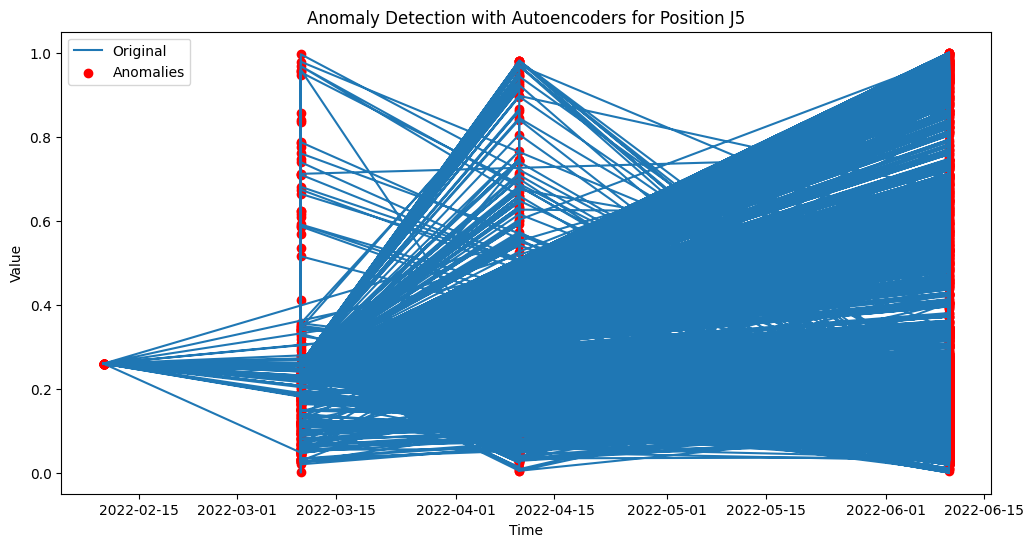

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Position J5'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Position J5')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0202 - val_loss: 0.0156
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0137 - val_loss: 0.0119
Epoch 3/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.0077
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0040
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 7.7345e-04
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 6.0618e-04 - val_loss: 3.9512e-04
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 3.7417e-04 - val_loss: 2.6876e-04
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 2.8872e-04 - val_loss: 2.1735e-04
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - los

63/63 [==============================] - 0s 920us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Current J6')

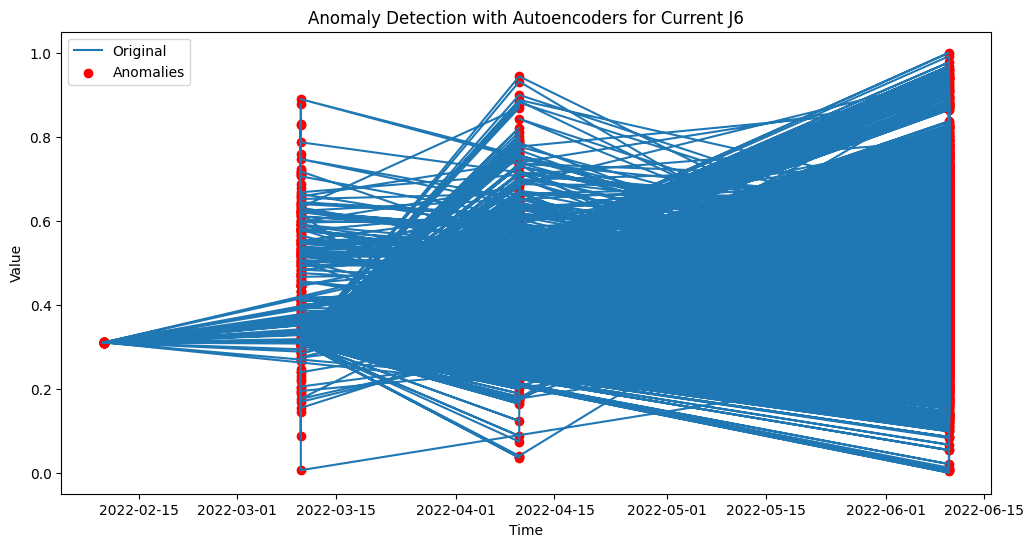

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Current J6'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Current J6')
plt.show()

# Print the anomalies
print(anomalies)


Epoch 1/50
250/250 [==============================] - 2s 5ms/step - loss: 0.0243 - val_loss: 0.0239
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0204 - val_loss: 0.0187
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0150 - val_loss: 0.0130
Epoch 4/50
250/250 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0085
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.0064 - val_loss: 0.0054
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0011

63/63 [==============================] - 0s 876us/step


<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Anomaly Detection with Autoencoders for Position J6')

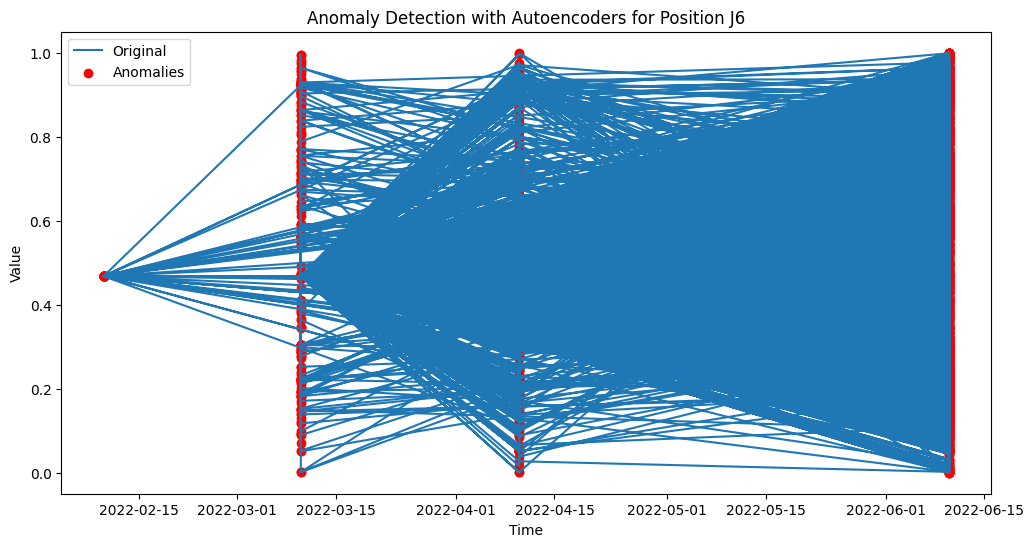

            Current J1  Position J1  Current J2  Position J2  Current J3  \
Date                                                                       
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-06-10       -2.32        14.05        0.13       -13.82       11.26   
...                ...          ...         ...          ...         ...   
2022-06-10        1.66        14.25        0.01       -15.06       11.69   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   
2022-03-10        0.00        14.71        0.00       -17.26       11.11   

           

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# 2.1 Load the data
df = pd.read_csv(path)

# Randomly select 10,000 rows from the DataFrame
df = df.sample(n=10000, random_state=35008)

# Assuming 'Date' is a datetime column, set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column you want to use for anomaly detection (e.g., 'Current J1')
feature = 'Position J6'

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
df[feature] = scaler.fit_transform(df[feature].values.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, _, _ = train_test_split(df[feature], df[feature], test_size=0.2, random_state=42)

# Define the autoencoder architecture
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu')(input_layer)  # Adjust the number of nodes in the hidden layer as needed
decoded = Dense(1, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Make predictions on the test data
decoded_data = autoencoder.predict(X_test)

# Calculate the mean squared error (MSE) between the original and reconstructed data
mse = np.mean(np.power(X_test.values.reshape(-1) - decoded_data.reshape(-1), 2))

# Set a threshold for anomaly detection (e.g., based on quantiles of MSE)
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

# Detect anomalies
anomalies = df[df[feature] > threshold]

# Plot the original and reconstructed signals, highlighting anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Original')
plt.scatter(anomalies.index, anomalies[feature], color='red', marker='o', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Anomaly Detection with Autoencoders for Position J6')
plt.show()

# Print the anomalies
print(anomalies)
